In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [9]:
df_train = pd.read_csv("src/data/train.csv") 
df_test = pd.read_csv("src/data/test.csv")

df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)

x = df_train.drop(['ID', 'Y_LABEL'], axis=1)
y = df_train['Y_LABEL']

df_test = df_test.drop(['ID'], axis = 1)

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y)

In [10]:
scaler = StandardScaler()
le = LabelEncoder()

def get_values(value):
  return value.values.reshape(-1, 1)

categorical_features = ['COMPONENT_ARBITRARY','YEAR']
test_stage_features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR' , 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

for col in x:
  if col not in categorical_features:
    x_train[col] = scaler.fit_transform(get_values(x_train[col]))
    x_valid[col] = scaler.transform(get_values(x_valid[col]))
    if col in df_test.columns:
        df_test[col] = scaler.transform(get_values(df_test[col]))

for col in categorical_features:
  x_train[col] = le.fit_transform(x_train[col])
  x_valid[col] = le.transform(x_valid[col])
  if col in df_test.columns:
      df_test[col] = le.transform(df_test[col])

C:\Users\User\AppData\Local\Temp\ipykernel_18220\1471479521.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = scaler.fit_transform(get_values(x_train[col]))
C:\Users\User\AppData\Local\Temp\ipykernel_18220\1471479521.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_valid[col] = scaler.transform(get_values(x_valid[col]))
C:\Users\User\AppData\Local\Temp\ipykernel_18220\1471479521.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [14]:
df_test

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,0,-0.216367,9,-0.348747,-0.147650,-0.085769,-0.17757,-0.249676,-0.301660,-0.040543,-0.238370,-0.403444,-0.187284,-0.264163,-0.099694,-0.10614,-0.357615,0.938960
1,2,-0.083676,4,-0.348747,-0.147650,-0.085769,-0.06249,-0.249676,0.175709,-0.040543,0.016114,-0.403444,-0.187284,1.526317,0.036715,-0.10614,0.343168,-1.084175
2,1,-0.262654,3,-0.348747,-0.147650,-0.085769,-0.17757,-0.140067,-0.314222,-0.040543,-0.238370,-0.403444,-0.187284,-0.263505,-0.099694,-0.10614,-1.282807,0.232082
3,2,-0.390055,2,-0.348747,-0.147650,-0.085769,-0.00495,-0.227754,-0.030672,-0.040543,0.100942,-0.353692,-0.187284,4.996112,-0.099694,-0.10614,0.656159,-0.930424
4,1,1.113405,6,-0.348747,-0.147650,-0.085769,-0.17757,-0.213140,-0.299865,-0.040543,-0.238370,-0.403444,-0.187284,-0.260216,-0.099694,-0.10614,-0.906825,-0.227296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,2,-0.321726,7,-0.348747,-0.147650,-0.085769,-0.00495,0.692966,1.555770,-0.040543,5.275454,-0.320524,0.316668,1.044164,-0.099694,-0.10614,-0.753282,1.073961
6037,2,0.211021,9,-0.348747,-0.147650,-0.085769,0.11013,-0.242369,0.997644,-0.040543,0.185770,-0.403444,-0.187284,0.185101,-0.099694,-0.10614,0.557734,-1.082300
6038,2,0.253781,7,-0.348747,-0.147650,-0.085769,-0.17757,-0.256984,-0.228080,-0.040543,-0.238370,-0.403444,-0.187284,-0.225354,-0.099694,-0.10614,3.793937,-1.082300
6039,1,-0.398872,6,-0.348747,-0.147650,-0.085769,-0.17757,0.196069,-0.319606,-0.040543,-0.238370,-0.403444,-0.187284,-0.267452,-0.099694,-0.10614,-1.148949,-0.210420


In [15]:
params = {'n_estimators': [100,200,400,600,800,1000],
        'max_depth' : [3,4,6,8,10,12],
        'eta' : [0.1], 
        'objective' : ['binary:logistic']}

model = XGBClassifier()
model_grid = GridSearchCV(model, param_grid=params, cv=3)
model_grid.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(x_valid, y_valid)])



[0]	validation_0-auc:0.80913
[1]	validation_0-auc:0.80979
[2]	validation_0-auc:0.80981
[3]	validation_0-auc:0.80988
[4]	validation_0-auc:0.81016
[5]	validation_0-auc:0.80795
[6]	validation_0-auc:0.82639
[7]	validation_0-auc:0.82687
[8]	validation_0-auc:0.83979
[9]	validation_0-auc:0.84007
[10]	validation_0-auc:0.83941
[11]	validation_0-auc:0.84036
[12]	validation_0-auc:0.84114
[13]	validation_0-auc:0.84161
[14]	validation_0-auc:0.84137
[15]	validation_0-auc:0.84151
[16]	validation_0-auc:0.84109
[17]	validation_0-auc:0.85074
[18]	validation_0-auc:0.85082
[19]	validation_0-auc:0.85993
[20]	validation_0-auc:0.86077
[21]	validation_0-auc:0.86240
[22]	validation_0-auc:0.86318
[23]	validation_0-auc:0.86144
[24]	validation_0-auc:0.86278
[25]	validation_0-auc:0.86264
[26]	validation_0-auc:0.86349
[27]	validation_0-auc:0.86463
[28]	validation_0-auc:0.86471
[29]	validation_0-auc:0.86694


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.86772
[31]	validation_0-auc:0.87072
[32]	validation_0-auc:0.87246
[33]	validation_0-auc:0.87447
[34]	validation_0-auc:0.87479
[35]	validation_0-auc:0.87585
[36]	validation_0-auc:0.87794
[37]	validation_0-auc:0.88000
[38]	validation_0-auc:0.88039
[39]	validation_0-auc:0.87984
[40]	validation_0-auc:0.88204
[41]	validation_0-auc:0.88211
[42]	validation_0-auc:0.88235
[43]	validation_0-auc:0.88251
[44]	validation_0-auc:0.88282
[45]	validation_0-auc:0.88239
[46]	validation_0-auc:0.88257
[47]	validation_0-auc:0.88258
[48]	validation_0-auc:0.88428
[49]	validation_0-auc:0.88401
[50]	validation_0-auc:0.88421
[51]	validation_0-auc:0.88394
[52]	validation_0-auc:0.88495
[53]	validation_0-auc:0.88561
[54]	validation_0-auc:0.88611
[55]	validation_0-auc:0.88665
[56]	validation_0-auc:0.88765
[57]	validation_0-auc:0.88778
[58]	validation_0-auc:0.88774
[59]	validation_0-auc:0.88825
[60]	validation_0-auc:0.88782
[61]	validation_0-auc:0.88809
[62]	validation_0-auc:0.88837
[63]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.86625
[26]	validation_0-auc:0.86709
[27]	validation_0-auc:0.86710
[28]	validation_0-auc:0.86860
[29]	validation_0-auc:0.86895
[30]	validation_0-auc:0.87057
[31]	validation_0-auc:0.87001
[32]	validation_0-auc:0.87079
[33]	validation_0-auc:0.87069
[34]	validation_0-auc:0.87058
[35]	validation_0-auc:0.87174
[36]	validation_0-auc:0.87325
[37]	validation_0-auc:0.87372
[38]	validation_0-auc:0.87544
[39]	validation_0-auc:0.87511
[40]	validation_0-auc:0.87491
[41]	validation_0-auc:0.87487
[42]	validation_0-auc:0.87455
[43]	validation_0-auc:0.87641
[44]	validation_0-auc:0.87684
[45]	validation_0-auc:0.87625
[46]	validation_0-auc:0.87599
[47]	validation_0-auc:0.87656
[48]	validation_0-auc:0.87611
[49]	validation_0-auc:0.87667
[50]	validation_0-auc:0.87740
[51]	validation_0-auc:0.87743
[52]	validation_0-auc:0.87745
[53]	validation_0-auc:0.87725
[54]	validation_0-auc:0.87729
[55]	validation_0-auc:0.87750
[56]	validation_0-auc:0.87827
[57]	validation_0-auc:0.87923
[58]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.87059
[28]	validation_0-auc:0.87000
[29]	validation_0-auc:0.87188
[30]	validation_0-auc:0.87293
[31]	validation_0-auc:0.87414
[32]	validation_0-auc:0.87439
[33]	validation_0-auc:0.87454
[34]	validation_0-auc:0.87687
[35]	validation_0-auc:0.87805
[36]	validation_0-auc:0.87762
[37]	validation_0-auc:0.87674
[38]	validation_0-auc:0.87826
[39]	validation_0-auc:0.87854
[40]	validation_0-auc:0.87886
[41]	validation_0-auc:0.88001
[42]	validation_0-auc:0.88049
[43]	validation_0-auc:0.87976
[44]	validation_0-auc:0.88074
[45]	validation_0-auc:0.88095
[46]	validation_0-auc:0.88095
[47]	validation_0-auc:0.88196
[48]	validation_0-auc:0.88316
[49]	validation_0-auc:0.88325
[50]	validation_0-auc:0.88445
[51]	validation_0-auc:0.88445
[52]	validation_0-auc:0.88405
[53]	validation_0-auc:0.88295
[54]	validation_0-auc:0.88287
[55]	validation_0-auc:0.88354
[56]	validation_0-auc:0.88361
[57]	validation_0-auc:0.88340
[58]	validation_0-auc:0.88350
[59]	validation_0-auc:0.88374
[60]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.87479
[35]	validation_0-auc:0.87585
[36]	validation_0-auc:0.87794
[37]	validation_0-auc:0.88000
[38]	validation_0-auc:0.88039
[39]	validation_0-auc:0.87984
[40]	validation_0-auc:0.88204
[41]	validation_0-auc:0.88211
[42]	validation_0-auc:0.88235
[43]	validation_0-auc:0.88251
[44]	validation_0-auc:0.88282
[45]	validation_0-auc:0.88239
[46]	validation_0-auc:0.88257
[47]	validation_0-auc:0.88258
[48]	validation_0-auc:0.88428
[49]	validation_0-auc:0.88401
[50]	validation_0-auc:0.88421
[51]	validation_0-auc:0.88394
[52]	validation_0-auc:0.88495
[53]	validation_0-auc:0.88561
[54]	validation_0-auc:0.88611
[55]	validation_0-auc:0.88665
[56]	validation_0-auc:0.88765
[57]	validation_0-auc:0.88778
[58]	validation_0-auc:0.88774
[59]	validation_0-auc:0.88825
[60]	validation_0-auc:0.88782
[61]	validation_0-auc:0.88809
[62]	validation_0-auc:0.88837
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88894
[65]	validation_0-auc:0.88886
[66]	validation_0-auc:0.88855
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87001
[32]	validation_0-auc:0.87079
[33]	validation_0-auc:0.87069
[34]	validation_0-auc:0.87058
[35]	validation_0-auc:0.87174
[36]	validation_0-auc:0.87325
[37]	validation_0-auc:0.87372
[38]	validation_0-auc:0.87544
[39]	validation_0-auc:0.87511
[40]	validation_0-auc:0.87491
[41]	validation_0-auc:0.87487
[42]	validation_0-auc:0.87455
[43]	validation_0-auc:0.87641
[44]	validation_0-auc:0.87684
[45]	validation_0-auc:0.87625
[46]	validation_0-auc:0.87599
[47]	validation_0-auc:0.87656
[48]	validation_0-auc:0.87611
[49]	validation_0-auc:0.87667
[50]	validation_0-auc:0.87740
[51]	validation_0-auc:0.87743
[52]	validation_0-auc:0.87745
[53]	validation_0-auc:0.87725
[54]	validation_0-auc:0.87729
[55]	validation_0-auc:0.87750
[56]	validation_0-auc:0.87827
[57]	validation_0-auc:0.87923
[58]	validation_0-auc:0.88039
[59]	validation_0-auc:0.87984
[60]	validation_0-auc:0.87983
[61]	validation_0-auc:0.87982
[62]	validation_0-auc:0.87952
[63]	validation_0-auc:0.87999
[64]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.87687
[35]	validation_0-auc:0.87805
[36]	validation_0-auc:0.87762
[37]	validation_0-auc:0.87674
[38]	validation_0-auc:0.87826
[39]	validation_0-auc:0.87854
[40]	validation_0-auc:0.87886
[41]	validation_0-auc:0.88001
[42]	validation_0-auc:0.88049
[43]	validation_0-auc:0.87976
[44]	validation_0-auc:0.88074
[45]	validation_0-auc:0.88095
[46]	validation_0-auc:0.88095
[47]	validation_0-auc:0.88196
[48]	validation_0-auc:0.88316
[49]	validation_0-auc:0.88325
[50]	validation_0-auc:0.88445
[51]	validation_0-auc:0.88445
[52]	validation_0-auc:0.88405
[53]	validation_0-auc:0.88295
[54]	validation_0-auc:0.88287
[55]	validation_0-auc:0.88354
[56]	validation_0-auc:0.88361
[57]	validation_0-auc:0.88340
[58]	validation_0-auc:0.88350
[59]	validation_0-auc:0.88374
[60]	validation_0-auc:0.88417
[61]	validation_0-auc:0.88336
[62]	validation_0-auc:0.88374
[63]	validation_0-auc:0.88410
[64]	validation_0-auc:0.88395
[65]	validation_0-auc:0.88390
[66]	validation_0-auc:0.88354
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.87479
[35]	validation_0-auc:0.87585
[36]	validation_0-auc:0.87794
[37]	validation_0-auc:0.88000
[38]	validation_0-auc:0.88039
[39]	validation_0-auc:0.87984
[40]	validation_0-auc:0.88204
[41]	validation_0-auc:0.88211
[42]	validation_0-auc:0.88235
[43]	validation_0-auc:0.88251
[44]	validation_0-auc:0.88282
[45]	validation_0-auc:0.88239
[46]	validation_0-auc:0.88257
[47]	validation_0-auc:0.88258
[48]	validation_0-auc:0.88428
[49]	validation_0-auc:0.88401
[50]	validation_0-auc:0.88421
[51]	validation_0-auc:0.88394
[52]	validation_0-auc:0.88495
[53]	validation_0-auc:0.88561
[54]	validation_0-auc:0.88611
[55]	validation_0-auc:0.88665
[56]	validation_0-auc:0.88765
[57]	validation_0-auc:0.88778
[58]	validation_0-auc:0.88774
[59]	validation_0-auc:0.88825
[60]	validation_0-auc:0.88782
[61]	validation_0-auc:0.88809
[62]	validation_0-auc:0.88837
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88894
[65]	validation_0-auc:0.88886
[66]	validation_0-auc:0.88855
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.87079
[33]	validation_0-auc:0.87069
[34]	validation_0-auc:0.87058
[35]	validation_0-auc:0.87174
[36]	validation_0-auc:0.87325
[37]	validation_0-auc:0.87372
[38]	validation_0-auc:0.87544
[39]	validation_0-auc:0.87511
[40]	validation_0-auc:0.87491
[41]	validation_0-auc:0.87487
[42]	validation_0-auc:0.87455
[43]	validation_0-auc:0.87641
[44]	validation_0-auc:0.87684
[45]	validation_0-auc:0.87625
[46]	validation_0-auc:0.87599
[47]	validation_0-auc:0.87656
[48]	validation_0-auc:0.87611
[49]	validation_0-auc:0.87667
[50]	validation_0-auc:0.87740
[51]	validation_0-auc:0.87743
[52]	validation_0-auc:0.87745
[53]	validation_0-auc:0.87725
[54]	validation_0-auc:0.87729
[55]	validation_0-auc:0.87750
[56]	validation_0-auc:0.87827
[57]	validation_0-auc:0.87923
[58]	validation_0-auc:0.88039
[59]	validation_0-auc:0.87984
[60]	validation_0-auc:0.87983
[61]	validation_0-auc:0.87982
[62]	validation_0-auc:0.87952
[63]	validation_0-auc:0.87999
[64]	validation_0-auc:0.88015
[65]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.87454
[34]	validation_0-auc:0.87687
[35]	validation_0-auc:0.87805
[36]	validation_0-auc:0.87762
[37]	validation_0-auc:0.87674
[38]	validation_0-auc:0.87826
[39]	validation_0-auc:0.87854
[40]	validation_0-auc:0.87886
[41]	validation_0-auc:0.88001
[42]	validation_0-auc:0.88049
[43]	validation_0-auc:0.87976
[44]	validation_0-auc:0.88074
[45]	validation_0-auc:0.88095
[46]	validation_0-auc:0.88095
[47]	validation_0-auc:0.88196
[48]	validation_0-auc:0.88316
[49]	validation_0-auc:0.88325
[50]	validation_0-auc:0.88445
[51]	validation_0-auc:0.88445
[52]	validation_0-auc:0.88405
[53]	validation_0-auc:0.88295
[54]	validation_0-auc:0.88287
[55]	validation_0-auc:0.88354
[56]	validation_0-auc:0.88361
[57]	validation_0-auc:0.88340
[58]	validation_0-auc:0.88350
[59]	validation_0-auc:0.88374
[60]	validation_0-auc:0.88417
[61]	validation_0-auc:0.88336
[62]	validation_0-auc:0.88374
[63]	validation_0-auc:0.88410
[64]	validation_0-auc:0.88395
[65]	validation_0-auc:0.88390
[66]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.87479
[35]	validation_0-auc:0.87585
[36]	validation_0-auc:0.87794
[37]	validation_0-auc:0.88000
[38]	validation_0-auc:0.88039
[39]	validation_0-auc:0.87984
[40]	validation_0-auc:0.88204
[41]	validation_0-auc:0.88211
[42]	validation_0-auc:0.88235
[43]	validation_0-auc:0.88251
[44]	validation_0-auc:0.88282
[45]	validation_0-auc:0.88239
[46]	validation_0-auc:0.88257
[47]	validation_0-auc:0.88258
[48]	validation_0-auc:0.88428
[49]	validation_0-auc:0.88401
[50]	validation_0-auc:0.88421
[51]	validation_0-auc:0.88394
[52]	validation_0-auc:0.88495
[53]	validation_0-auc:0.88561
[54]	validation_0-auc:0.88611
[55]	validation_0-auc:0.88665
[56]	validation_0-auc:0.88765
[57]	validation_0-auc:0.88778
[58]	validation_0-auc:0.88774
[59]	validation_0-auc:0.88825
[60]	validation_0-auc:0.88782
[61]	validation_0-auc:0.88809
[62]	validation_0-auc:0.88837
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88894
[65]	validation_0-auc:0.88886
[66]	validation_0-auc:0.88855
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:0.87325
[37]	validation_0-auc:0.87372
[38]	validation_0-auc:0.87544
[39]	validation_0-auc:0.87511
[40]	validation_0-auc:0.87491
[41]	validation_0-auc:0.87487
[42]	validation_0-auc:0.87455
[43]	validation_0-auc:0.87641
[44]	validation_0-auc:0.87684
[45]	validation_0-auc:0.87625
[46]	validation_0-auc:0.87599
[47]	validation_0-auc:0.87656
[48]	validation_0-auc:0.87611
[49]	validation_0-auc:0.87667
[50]	validation_0-auc:0.87740
[51]	validation_0-auc:0.87743
[52]	validation_0-auc:0.87745
[53]	validation_0-auc:0.87725
[54]	validation_0-auc:0.87729
[55]	validation_0-auc:0.87750
[56]	validation_0-auc:0.87827
[57]	validation_0-auc:0.87923
[58]	validation_0-auc:0.88039
[59]	validation_0-auc:0.87984
[60]	validation_0-auc:0.87983
[61]	validation_0-auc:0.87982
[62]	validation_0-auc:0.87952
[63]	validation_0-auc:0.87999
[64]	validation_0-auc:0.88015
[65]	validation_0-auc:0.88006
[66]	validation_0-auc:0.88002
[67]	validation_0-auc:0.87990
[68]	validation_0-auc:0.88050
[69]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-auc:0.87886
[41]	validation_0-auc:0.88001
[42]	validation_0-auc:0.88049
[43]	validation_0-auc:0.87976
[44]	validation_0-auc:0.88074
[45]	validation_0-auc:0.88095
[46]	validation_0-auc:0.88095
[47]	validation_0-auc:0.88196
[48]	validation_0-auc:0.88316
[49]	validation_0-auc:0.88325
[50]	validation_0-auc:0.88445
[51]	validation_0-auc:0.88445
[52]	validation_0-auc:0.88405
[53]	validation_0-auc:0.88295
[54]	validation_0-auc:0.88287
[55]	validation_0-auc:0.88354
[56]	validation_0-auc:0.88361
[57]	validation_0-auc:0.88340
[58]	validation_0-auc:0.88350
[59]	validation_0-auc:0.88374
[60]	validation_0-auc:0.88417
[61]	validation_0-auc:0.88336
[62]	validation_0-auc:0.88374
[63]	validation_0-auc:0.88410
[64]	validation_0-auc:0.88395
[65]	validation_0-auc:0.88390
[66]	validation_0-auc:0.88354
[67]	validation_0-auc:0.88446
[68]	validation_0-auc:0.88431
[69]	validation_0-auc:0.88443
[70]	validation_0-auc:0.88438
[71]	validation_0-auc:0.88407
[72]	validation_0-auc:0.88377
[73]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-auc:0.88211
[42]	validation_0-auc:0.88235
[43]	validation_0-auc:0.88251
[44]	validation_0-auc:0.88282
[45]	validation_0-auc:0.88239
[46]	validation_0-auc:0.88257
[47]	validation_0-auc:0.88258
[48]	validation_0-auc:0.88428
[49]	validation_0-auc:0.88401
[50]	validation_0-auc:0.88421
[51]	validation_0-auc:0.88394
[52]	validation_0-auc:0.88495
[53]	validation_0-auc:0.88561
[54]	validation_0-auc:0.88611
[55]	validation_0-auc:0.88665
[56]	validation_0-auc:0.88765
[57]	validation_0-auc:0.88778
[58]	validation_0-auc:0.88774
[59]	validation_0-auc:0.88825
[60]	validation_0-auc:0.88782
[61]	validation_0-auc:0.88809
[62]	validation_0-auc:0.88837
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88894
[65]	validation_0-auc:0.88886
[66]	validation_0-auc:0.88855
[67]	validation_0-auc:0.88952
[68]	validation_0-auc:0.88965
[69]	validation_0-auc:0.89006
[70]	validation_0-auc:0.88971
[71]	validation_0-auc:0.88942
[72]	validation_0-auc:0.88978
[73]	validation_0-auc:0.88981
[74]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:0.87325
[37]	validation_0-auc:0.87372
[38]	validation_0-auc:0.87544
[39]	validation_0-auc:0.87511
[40]	validation_0-auc:0.87491
[41]	validation_0-auc:0.87487
[42]	validation_0-auc:0.87455
[43]	validation_0-auc:0.87641
[44]	validation_0-auc:0.87684
[45]	validation_0-auc:0.87625
[46]	validation_0-auc:0.87599
[47]	validation_0-auc:0.87656
[48]	validation_0-auc:0.87611
[49]	validation_0-auc:0.87667
[50]	validation_0-auc:0.87740
[51]	validation_0-auc:0.87743
[52]	validation_0-auc:0.87745
[53]	validation_0-auc:0.87725
[54]	validation_0-auc:0.87729
[55]	validation_0-auc:0.87750
[56]	validation_0-auc:0.87827
[57]	validation_0-auc:0.87923
[58]	validation_0-auc:0.88039
[59]	validation_0-auc:0.87984
[60]	validation_0-auc:0.87983
[61]	validation_0-auc:0.87982
[62]	validation_0-auc:0.87952
[63]	validation_0-auc:0.87999
[64]	validation_0-auc:0.88015
[65]	validation_0-auc:0.88006
[66]	validation_0-auc:0.88002
[67]	validation_0-auc:0.87990
[68]	validation_0-auc:0.88050
[69]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-auc:0.87854
[40]	validation_0-auc:0.87886
[41]	validation_0-auc:0.88001
[42]	validation_0-auc:0.88049
[43]	validation_0-auc:0.87976
[44]	validation_0-auc:0.88074
[45]	validation_0-auc:0.88095
[46]	validation_0-auc:0.88095
[47]	validation_0-auc:0.88196
[48]	validation_0-auc:0.88316
[49]	validation_0-auc:0.88325
[50]	validation_0-auc:0.88445
[51]	validation_0-auc:0.88445
[52]	validation_0-auc:0.88405
[53]	validation_0-auc:0.88295
[54]	validation_0-auc:0.88287
[55]	validation_0-auc:0.88354
[56]	validation_0-auc:0.88361
[57]	validation_0-auc:0.88340
[58]	validation_0-auc:0.88350
[59]	validation_0-auc:0.88374
[60]	validation_0-auc:0.88417
[61]	validation_0-auc:0.88336
[62]	validation_0-auc:0.88374
[63]	validation_0-auc:0.88410
[64]	validation_0-auc:0.88395
[65]	validation_0-auc:0.88390
[66]	validation_0-auc:0.88354
[67]	validation_0-auc:0.88446
[68]	validation_0-auc:0.88431
[69]	validation_0-auc:0.88443
[70]	validation_0-auc:0.88438
[71]	validation_0-auc:0.88407
[72]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:0.87794
[37]	validation_0-auc:0.88000
[38]	validation_0-auc:0.88039
[39]	validation_0-auc:0.87984
[40]	validation_0-auc:0.88204
[41]	validation_0-auc:0.88211
[42]	validation_0-auc:0.88235
[43]	validation_0-auc:0.88251
[44]	validation_0-auc:0.88282
[45]	validation_0-auc:0.88239
[46]	validation_0-auc:0.88257
[47]	validation_0-auc:0.88258
[48]	validation_0-auc:0.88428
[49]	validation_0-auc:0.88401
[50]	validation_0-auc:0.88421
[51]	validation_0-auc:0.88394
[52]	validation_0-auc:0.88495
[53]	validation_0-auc:0.88561
[54]	validation_0-auc:0.88611
[55]	validation_0-auc:0.88665
[56]	validation_0-auc:0.88765
[57]	validation_0-auc:0.88778
[58]	validation_0-auc:0.88774
[59]	validation_0-auc:0.88825
[60]	validation_0-auc:0.88782
[61]	validation_0-auc:0.88809
[62]	validation_0-auc:0.88837
[63]	validation_0-auc:0.88872
[64]	validation_0-auc:0.88894
[65]	validation_0-auc:0.88886
[66]	validation_0-auc:0.88855
[67]	validation_0-auc:0.88952
[68]	validation_0-auc:0.88965
[69]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.87174
[36]	validation_0-auc:0.87325
[37]	validation_0-auc:0.87372
[38]	validation_0-auc:0.87544
[39]	validation_0-auc:0.87511
[40]	validation_0-auc:0.87491
[41]	validation_0-auc:0.87487
[42]	validation_0-auc:0.87455
[43]	validation_0-auc:0.87641
[44]	validation_0-auc:0.87684
[45]	validation_0-auc:0.87625
[46]	validation_0-auc:0.87599
[47]	validation_0-auc:0.87656
[48]	validation_0-auc:0.87611
[49]	validation_0-auc:0.87667
[50]	validation_0-auc:0.87740
[51]	validation_0-auc:0.87743
[52]	validation_0-auc:0.87745
[53]	validation_0-auc:0.87725
[54]	validation_0-auc:0.87729
[55]	validation_0-auc:0.87750
[56]	validation_0-auc:0.87827
[57]	validation_0-auc:0.87923
[58]	validation_0-auc:0.88039
[59]	validation_0-auc:0.87984
[60]	validation_0-auc:0.87983
[61]	validation_0-auc:0.87982
[62]	validation_0-auc:0.87952
[63]	validation_0-auc:0.87999
[64]	validation_0-auc:0.88015
[65]	validation_0-auc:0.88006
[66]	validation_0-auc:0.88002
[67]	validation_0-auc:0.87990
[68]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.87439
[33]	validation_0-auc:0.87454
[34]	validation_0-auc:0.87687
[35]	validation_0-auc:0.87805
[36]	validation_0-auc:0.87762
[37]	validation_0-auc:0.87674
[38]	validation_0-auc:0.87826
[39]	validation_0-auc:0.87854
[40]	validation_0-auc:0.87886
[41]	validation_0-auc:0.88001
[42]	validation_0-auc:0.88049
[43]	validation_0-auc:0.87976
[44]	validation_0-auc:0.88074
[45]	validation_0-auc:0.88095
[46]	validation_0-auc:0.88095
[47]	validation_0-auc:0.88196
[48]	validation_0-auc:0.88316
[49]	validation_0-auc:0.88325
[50]	validation_0-auc:0.88445
[51]	validation_0-auc:0.88445
[52]	validation_0-auc:0.88405
[53]	validation_0-auc:0.88295
[54]	validation_0-auc:0.88287
[55]	validation_0-auc:0.88354
[56]	validation_0-auc:0.88361
[57]	validation_0-auc:0.88340
[58]	validation_0-auc:0.88350
[59]	validation_0-auc:0.88374
[60]	validation_0-auc:0.88417
[61]	validation_0-auc:0.88336
[62]	validation_0-auc:0.88374
[63]	validation_0-auc:0.88410
[64]	validation_0-auc:0.88395
[65]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.87464
[30]	validation_0-auc:0.87349
[31]	validation_0-auc:0.87574
[32]	validation_0-auc:0.87555
[33]	validation_0-auc:0.88070
[34]	validation_0-auc:0.88014
[35]	validation_0-auc:0.88142
[36]	validation_0-auc:0.88252
[37]	validation_0-auc:0.88425
[38]	validation_0-auc:0.88467
[39]	validation_0-auc:0.88533
[40]	validation_0-auc:0.88676
[41]	validation_0-auc:0.88655
[42]	validation_0-auc:0.88755
[43]	validation_0-auc:0.88867
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88829
[47]	validation_0-auc:0.88834
[48]	validation_0-auc:0.88881
[49]	validation_0-auc:0.88932
[50]	validation_0-auc:0.88876
[51]	validation_0-auc:0.88970
[52]	validation_0-auc:0.89007
[53]	validation_0-auc:0.89047
[54]	validation_0-auc:0.89029
[55]	validation_0-auc:0.89084
[56]	validation_0-auc:0.89099
[57]	validation_0-auc:0.89084
[58]	validation_0-auc:0.89126
[59]	validation_0-auc:0.89151
[60]	validation_0-auc:0.89181
[61]	validation_0-auc:0.89191
[62]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.86968
[29]	validation_0-auc:0.87067
[30]	validation_0-auc:0.87193
[31]	validation_0-auc:0.87332
[32]	validation_0-auc:0.87581
[33]	validation_0-auc:0.87708
[34]	validation_0-auc:0.87672
[35]	validation_0-auc:0.87712
[36]	validation_0-auc:0.87695
[37]	validation_0-auc:0.87691
[38]	validation_0-auc:0.87772
[39]	validation_0-auc:0.87847
[40]	validation_0-auc:0.87892
[41]	validation_0-auc:0.87924
[42]	validation_0-auc:0.87895
[43]	validation_0-auc:0.87875
[44]	validation_0-auc:0.87988
[45]	validation_0-auc:0.87971
[46]	validation_0-auc:0.87991
[47]	validation_0-auc:0.88016
[48]	validation_0-auc:0.88055
[49]	validation_0-auc:0.88021
[50]	validation_0-auc:0.88090
[51]	validation_0-auc:0.88062
[52]	validation_0-auc:0.88178
[53]	validation_0-auc:0.88271
[54]	validation_0-auc:0.88222
[55]	validation_0-auc:0.88279
[56]	validation_0-auc:0.88301
[57]	validation_0-auc:0.88325
[58]	validation_0-auc:0.88368
[59]	validation_0-auc:0.88482
[60]	validation_0-auc:0.88495
[61]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.88166
[35]	validation_0-auc:0.88206
[36]	validation_0-auc:0.88190
[37]	validation_0-auc:0.88198
[38]	validation_0-auc:0.88318
[39]	validation_0-auc:0.88294
[40]	validation_0-auc:0.88308
[41]	validation_0-auc:0.88299
[42]	validation_0-auc:0.88331
[43]	validation_0-auc:0.88332
[44]	validation_0-auc:0.88299
[45]	validation_0-auc:0.88269
[46]	validation_0-auc:0.88220
[47]	validation_0-auc:0.88261
[48]	validation_0-auc:0.88320
[49]	validation_0-auc:0.88342
[50]	validation_0-auc:0.88315
[51]	validation_0-auc:0.88288
[52]	validation_0-auc:0.88291
[53]	validation_0-auc:0.88299
[54]	validation_0-auc:0.88304
[55]	validation_0-auc:0.88280
[56]	validation_0-auc:0.88272
[57]	validation_0-auc:0.88233
[58]	validation_0-auc:0.88255
[59]	validation_0-auc:0.88250
[60]	validation_0-auc:0.88163
[61]	validation_0-auc:0.88126
[62]	validation_0-auc:0.88163
[63]	validation_0-auc:0.88170
[64]	validation_0-auc:0.88165
[65]	validation_0-auc:0.88178
[66]	validation_0-auc:0.88198
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.88014
[35]	validation_0-auc:0.88142
[36]	validation_0-auc:0.88252
[37]	validation_0-auc:0.88425
[38]	validation_0-auc:0.88467
[39]	validation_0-auc:0.88533
[40]	validation_0-auc:0.88676
[41]	validation_0-auc:0.88655
[42]	validation_0-auc:0.88755
[43]	validation_0-auc:0.88867
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88829
[47]	validation_0-auc:0.88834
[48]	validation_0-auc:0.88881
[49]	validation_0-auc:0.88932
[50]	validation_0-auc:0.88876
[51]	validation_0-auc:0.88970
[52]	validation_0-auc:0.89007
[53]	validation_0-auc:0.89047
[54]	validation_0-auc:0.89029
[55]	validation_0-auc:0.89084
[56]	validation_0-auc:0.89099
[57]	validation_0-auc:0.89084
[58]	validation_0-auc:0.89126
[59]	validation_0-auc:0.89151
[60]	validation_0-auc:0.89181
[61]	validation_0-auc:0.89191
[62]	validation_0-auc:0.89163
[63]	validation_0-auc:0.89151
[64]	validation_0-auc:0.89230
[65]	validation_0-auc:0.89284
[66]	validation_0-auc:0.89386
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.87708
[34]	validation_0-auc:0.87672
[35]	validation_0-auc:0.87712
[36]	validation_0-auc:0.87695
[37]	validation_0-auc:0.87691
[38]	validation_0-auc:0.87772
[39]	validation_0-auc:0.87847
[40]	validation_0-auc:0.87892
[41]	validation_0-auc:0.87924
[42]	validation_0-auc:0.87895
[43]	validation_0-auc:0.87875
[44]	validation_0-auc:0.87988
[45]	validation_0-auc:0.87971
[46]	validation_0-auc:0.87991
[47]	validation_0-auc:0.88016
[48]	validation_0-auc:0.88055
[49]	validation_0-auc:0.88021
[50]	validation_0-auc:0.88090
[51]	validation_0-auc:0.88062
[52]	validation_0-auc:0.88178
[53]	validation_0-auc:0.88271
[54]	validation_0-auc:0.88222
[55]	validation_0-auc:0.88279
[56]	validation_0-auc:0.88301
[57]	validation_0-auc:0.88325
[58]	validation_0-auc:0.88368
[59]	validation_0-auc:0.88482
[60]	validation_0-auc:0.88495
[61]	validation_0-auc:0.88457
[62]	validation_0-auc:0.88483
[63]	validation_0-auc:0.88498
[64]	validation_0-auc:0.88551
[65]	validation_0-auc:0.88618
[66]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.88078
[33]	validation_0-auc:0.88040
[34]	validation_0-auc:0.88166
[35]	validation_0-auc:0.88206
[36]	validation_0-auc:0.88190
[37]	validation_0-auc:0.88198
[38]	validation_0-auc:0.88318
[39]	validation_0-auc:0.88294
[40]	validation_0-auc:0.88308
[41]	validation_0-auc:0.88299
[42]	validation_0-auc:0.88331
[43]	validation_0-auc:0.88332
[44]	validation_0-auc:0.88299
[45]	validation_0-auc:0.88269
[46]	validation_0-auc:0.88220
[47]	validation_0-auc:0.88261
[48]	validation_0-auc:0.88320
[49]	validation_0-auc:0.88342
[50]	validation_0-auc:0.88315
[51]	validation_0-auc:0.88288
[52]	validation_0-auc:0.88291
[53]	validation_0-auc:0.88299
[54]	validation_0-auc:0.88304
[55]	validation_0-auc:0.88280
[56]	validation_0-auc:0.88272
[57]	validation_0-auc:0.88233
[58]	validation_0-auc:0.88255
[59]	validation_0-auc:0.88250
[60]	validation_0-auc:0.88163
[61]	validation_0-auc:0.88126
[62]	validation_0-auc:0.88163
[63]	validation_0-auc:0.88170
[64]	validation_0-auc:0.88165
[65]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87574
[32]	validation_0-auc:0.87555
[33]	validation_0-auc:0.88070
[34]	validation_0-auc:0.88014
[35]	validation_0-auc:0.88142
[36]	validation_0-auc:0.88252
[37]	validation_0-auc:0.88425
[38]	validation_0-auc:0.88467
[39]	validation_0-auc:0.88533
[40]	validation_0-auc:0.88676
[41]	validation_0-auc:0.88655
[42]	validation_0-auc:0.88755
[43]	validation_0-auc:0.88867
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88829
[47]	validation_0-auc:0.88834
[48]	validation_0-auc:0.88881
[49]	validation_0-auc:0.88932
[50]	validation_0-auc:0.88876
[51]	validation_0-auc:0.88970
[52]	validation_0-auc:0.89007
[53]	validation_0-auc:0.89047
[54]	validation_0-auc:0.89029
[55]	validation_0-auc:0.89084
[56]	validation_0-auc:0.89099
[57]	validation_0-auc:0.89084
[58]	validation_0-auc:0.89126
[59]	validation_0-auc:0.89151
[60]	validation_0-auc:0.89181
[61]	validation_0-auc:0.89191
[62]	validation_0-auc:0.89163
[63]	validation_0-auc:0.89151
[64]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.87712
[36]	validation_0-auc:0.87695
[37]	validation_0-auc:0.87691
[38]	validation_0-auc:0.87772
[39]	validation_0-auc:0.87847
[40]	validation_0-auc:0.87892
[41]	validation_0-auc:0.87924
[42]	validation_0-auc:0.87895
[43]	validation_0-auc:0.87875
[44]	validation_0-auc:0.87988
[45]	validation_0-auc:0.87971
[46]	validation_0-auc:0.87991
[47]	validation_0-auc:0.88016
[48]	validation_0-auc:0.88055
[49]	validation_0-auc:0.88021
[50]	validation_0-auc:0.88090
[51]	validation_0-auc:0.88062
[52]	validation_0-auc:0.88178
[53]	validation_0-auc:0.88271
[54]	validation_0-auc:0.88222
[55]	validation_0-auc:0.88279
[56]	validation_0-auc:0.88301
[57]	validation_0-auc:0.88325
[58]	validation_0-auc:0.88368
[59]	validation_0-auc:0.88482
[60]	validation_0-auc:0.88495
[61]	validation_0-auc:0.88457
[62]	validation_0-auc:0.88483
[63]	validation_0-auc:0.88498
[64]	validation_0-auc:0.88551
[65]	validation_0-auc:0.88618
[66]	validation_0-auc:0.88634
[67]	validation_0-auc:0.88707
[68]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.88040
[34]	validation_0-auc:0.88166
[35]	validation_0-auc:0.88206
[36]	validation_0-auc:0.88190
[37]	validation_0-auc:0.88198
[38]	validation_0-auc:0.88318
[39]	validation_0-auc:0.88294
[40]	validation_0-auc:0.88308
[41]	validation_0-auc:0.88299
[42]	validation_0-auc:0.88331
[43]	validation_0-auc:0.88332
[44]	validation_0-auc:0.88299
[45]	validation_0-auc:0.88269
[46]	validation_0-auc:0.88220
[47]	validation_0-auc:0.88261
[48]	validation_0-auc:0.88320
[49]	validation_0-auc:0.88342
[50]	validation_0-auc:0.88315
[51]	validation_0-auc:0.88288
[52]	validation_0-auc:0.88291
[53]	validation_0-auc:0.88299
[54]	validation_0-auc:0.88304
[55]	validation_0-auc:0.88280
[56]	validation_0-auc:0.88272
[57]	validation_0-auc:0.88233
[58]	validation_0-auc:0.88255
[59]	validation_0-auc:0.88250
[60]	validation_0-auc:0.88163
[61]	validation_0-auc:0.88126
[62]	validation_0-auc:0.88163
[63]	validation_0-auc:0.88170
[64]	validation_0-auc:0.88165
[65]	validation_0-auc:0.88178
[66]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.88014
[35]	validation_0-auc:0.88142
[36]	validation_0-auc:0.88252
[37]	validation_0-auc:0.88425
[38]	validation_0-auc:0.88467
[39]	validation_0-auc:0.88533
[40]	validation_0-auc:0.88676
[41]	validation_0-auc:0.88655
[42]	validation_0-auc:0.88755
[43]	validation_0-auc:0.88867
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88829
[47]	validation_0-auc:0.88834
[48]	validation_0-auc:0.88881
[49]	validation_0-auc:0.88932
[50]	validation_0-auc:0.88876
[51]	validation_0-auc:0.88970
[52]	validation_0-auc:0.89007
[53]	validation_0-auc:0.89047
[54]	validation_0-auc:0.89029
[55]	validation_0-auc:0.89084
[56]	validation_0-auc:0.89099
[57]	validation_0-auc:0.89084
[58]	validation_0-auc:0.89126
[59]	validation_0-auc:0.89151
[60]	validation_0-auc:0.89181
[61]	validation_0-auc:0.89191
[62]	validation_0-auc:0.89163
[63]	validation_0-auc:0.89151
[64]	validation_0-auc:0.89230
[65]	validation_0-auc:0.89284
[66]	validation_0-auc:0.89386
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.87672
[35]	validation_0-auc:0.87712
[36]	validation_0-auc:0.87695
[37]	validation_0-auc:0.87691
[38]	validation_0-auc:0.87772
[39]	validation_0-auc:0.87847
[40]	validation_0-auc:0.87892
[41]	validation_0-auc:0.87924
[42]	validation_0-auc:0.87895
[43]	validation_0-auc:0.87875
[44]	validation_0-auc:0.87988
[45]	validation_0-auc:0.87971
[46]	validation_0-auc:0.87991
[47]	validation_0-auc:0.88016
[48]	validation_0-auc:0.88055
[49]	validation_0-auc:0.88021
[50]	validation_0-auc:0.88090
[51]	validation_0-auc:0.88062
[52]	validation_0-auc:0.88178
[53]	validation_0-auc:0.88271
[54]	validation_0-auc:0.88222
[55]	validation_0-auc:0.88279
[56]	validation_0-auc:0.88301
[57]	validation_0-auc:0.88325
[58]	validation_0-auc:0.88368
[59]	validation_0-auc:0.88482
[60]	validation_0-auc:0.88495
[61]	validation_0-auc:0.88457
[62]	validation_0-auc:0.88483
[63]	validation_0-auc:0.88498
[64]	validation_0-auc:0.88551
[65]	validation_0-auc:0.88618
[66]	validation_0-auc:0.88634
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.88206
[36]	validation_0-auc:0.88190
[37]	validation_0-auc:0.88198
[38]	validation_0-auc:0.88318
[39]	validation_0-auc:0.88294
[40]	validation_0-auc:0.88308
[41]	validation_0-auc:0.88299
[42]	validation_0-auc:0.88331
[43]	validation_0-auc:0.88332
[44]	validation_0-auc:0.88299
[45]	validation_0-auc:0.88269
[46]	validation_0-auc:0.88220
[47]	validation_0-auc:0.88261
[48]	validation_0-auc:0.88320
[49]	validation_0-auc:0.88342
[50]	validation_0-auc:0.88315
[51]	validation_0-auc:0.88288
[52]	validation_0-auc:0.88291
[53]	validation_0-auc:0.88299
[54]	validation_0-auc:0.88304
[55]	validation_0-auc:0.88280
[56]	validation_0-auc:0.88272
[57]	validation_0-auc:0.88233
[58]	validation_0-auc:0.88255
[59]	validation_0-auc:0.88250
[60]	validation_0-auc:0.88163
[61]	validation_0-auc:0.88126
[62]	validation_0-auc:0.88163
[63]	validation_0-auc:0.88170
[64]	validation_0-auc:0.88165
[65]	validation_0-auc:0.88178
[66]	validation_0-auc:0.88198
[67]	validation_0-auc:0.88158
[68]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:0.88252
[37]	validation_0-auc:0.88425
[38]	validation_0-auc:0.88467
[39]	validation_0-auc:0.88533
[40]	validation_0-auc:0.88676
[41]	validation_0-auc:0.88655
[42]	validation_0-auc:0.88755
[43]	validation_0-auc:0.88867
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88829
[47]	validation_0-auc:0.88834
[48]	validation_0-auc:0.88881
[49]	validation_0-auc:0.88932
[50]	validation_0-auc:0.88876
[51]	validation_0-auc:0.88970
[52]	validation_0-auc:0.89007
[53]	validation_0-auc:0.89047
[54]	validation_0-auc:0.89029
[55]	validation_0-auc:0.89084
[56]	validation_0-auc:0.89099
[57]	validation_0-auc:0.89084
[58]	validation_0-auc:0.89126
[59]	validation_0-auc:0.89151
[60]	validation_0-auc:0.89181
[61]	validation_0-auc:0.89191
[62]	validation_0-auc:0.89163
[63]	validation_0-auc:0.89151
[64]	validation_0-auc:0.89230
[65]	validation_0-auc:0.89284
[66]	validation_0-auc:0.89386
[67]	validation_0-auc:0.89376
[68]	validation_0-auc:0.89361
[69]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:0.87695
[37]	validation_0-auc:0.87691
[38]	validation_0-auc:0.87772
[39]	validation_0-auc:0.87847
[40]	validation_0-auc:0.87892
[41]	validation_0-auc:0.87924
[42]	validation_0-auc:0.87895
[43]	validation_0-auc:0.87875
[44]	validation_0-auc:0.87988
[45]	validation_0-auc:0.87971
[46]	validation_0-auc:0.87991
[47]	validation_0-auc:0.88016
[48]	validation_0-auc:0.88055
[49]	validation_0-auc:0.88021
[50]	validation_0-auc:0.88090
[51]	validation_0-auc:0.88062
[52]	validation_0-auc:0.88178
[53]	validation_0-auc:0.88271
[54]	validation_0-auc:0.88222
[55]	validation_0-auc:0.88279
[56]	validation_0-auc:0.88301
[57]	validation_0-auc:0.88325
[58]	validation_0-auc:0.88368
[59]	validation_0-auc:0.88482
[60]	validation_0-auc:0.88495
[61]	validation_0-auc:0.88457
[62]	validation_0-auc:0.88483
[63]	validation_0-auc:0.88498
[64]	validation_0-auc:0.88551
[65]	validation_0-auc:0.88618
[66]	validation_0-auc:0.88634
[67]	validation_0-auc:0.88707
[68]	validation_0-auc:0.88666
[69]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.87443
[25]	validation_0-auc:0.87644
[26]	validation_0-auc:0.87661
[27]	validation_0-auc:0.87630
[28]	validation_0-auc:0.87859
[29]	validation_0-auc:0.88038
[30]	validation_0-auc:0.88039
[31]	validation_0-auc:0.88067
[32]	validation_0-auc:0.88078
[33]	validation_0-auc:0.88040
[34]	validation_0-auc:0.88166
[35]	validation_0-auc:0.88206
[36]	validation_0-auc:0.88190
[37]	validation_0-auc:0.88198
[38]	validation_0-auc:0.88318
[39]	validation_0-auc:0.88294
[40]	validation_0-auc:0.88308
[41]	validation_0-auc:0.88299
[42]	validation_0-auc:0.88331
[43]	validation_0-auc:0.88332
[44]	validation_0-auc:0.88299
[45]	validation_0-auc:0.88269
[46]	validation_0-auc:0.88220
[47]	validation_0-auc:0.88261
[48]	validation_0-auc:0.88320
[49]	validation_0-auc:0.88342
[50]	validation_0-auc:0.88315
[51]	validation_0-auc:0.88288
[52]	validation_0-auc:0.88291
[53]	validation_0-auc:0.88299
[54]	validation_0-auc:0.88304
[55]	validation_0-auc:0.88280
[56]	validation_0-auc:0.88272
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87574
[32]	validation_0-auc:0.87555
[33]	validation_0-auc:0.88070
[34]	validation_0-auc:0.88014
[35]	validation_0-auc:0.88142
[36]	validation_0-auc:0.88252
[37]	validation_0-auc:0.88425
[38]	validation_0-auc:0.88467
[39]	validation_0-auc:0.88533
[40]	validation_0-auc:0.88676
[41]	validation_0-auc:0.88655
[42]	validation_0-auc:0.88755
[43]	validation_0-auc:0.88867
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88811
[46]	validation_0-auc:0.88829
[47]	validation_0-auc:0.88834
[48]	validation_0-auc:0.88881
[49]	validation_0-auc:0.88932
[50]	validation_0-auc:0.88876
[51]	validation_0-auc:0.88970
[52]	validation_0-auc:0.89007
[53]	validation_0-auc:0.89047
[54]	validation_0-auc:0.89029
[55]	validation_0-auc:0.89084
[56]	validation_0-auc:0.89099
[57]	validation_0-auc:0.89084
[58]	validation_0-auc:0.89126
[59]	validation_0-auc:0.89151
[60]	validation_0-auc:0.89181
[61]	validation_0-auc:0.89191
[62]	validation_0-auc:0.89163
[63]	validation_0-auc:0.89151
[64]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.86781
[26]	validation_0-auc:0.87000
[27]	validation_0-auc:0.86973
[28]	validation_0-auc:0.86968
[29]	validation_0-auc:0.87067
[30]	validation_0-auc:0.87193
[31]	validation_0-auc:0.87332
[32]	validation_0-auc:0.87581
[33]	validation_0-auc:0.87708
[34]	validation_0-auc:0.87672
[35]	validation_0-auc:0.87712
[36]	validation_0-auc:0.87695
[37]	validation_0-auc:0.87691
[38]	validation_0-auc:0.87772
[39]	validation_0-auc:0.87847
[40]	validation_0-auc:0.87892
[41]	validation_0-auc:0.87924
[42]	validation_0-auc:0.87895
[43]	validation_0-auc:0.87875
[44]	validation_0-auc:0.87988
[45]	validation_0-auc:0.87971
[46]	validation_0-auc:0.87991
[47]	validation_0-auc:0.88016
[48]	validation_0-auc:0.88055
[49]	validation_0-auc:0.88021
[50]	validation_0-auc:0.88090
[51]	validation_0-auc:0.88062
[52]	validation_0-auc:0.88178
[53]	validation_0-auc:0.88271
[54]	validation_0-auc:0.88222
[55]	validation_0-auc:0.88279
[56]	validation_0-auc:0.88301
[57]	validation_0-auc:0.88325
[58]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.87661
[27]	validation_0-auc:0.87630
[28]	validation_0-auc:0.87859
[29]	validation_0-auc:0.88038
[30]	validation_0-auc:0.88039
[31]	validation_0-auc:0.88067
[32]	validation_0-auc:0.88078
[33]	validation_0-auc:0.88040
[34]	validation_0-auc:0.88166
[35]	validation_0-auc:0.88206
[36]	validation_0-auc:0.88190
[37]	validation_0-auc:0.88198
[38]	validation_0-auc:0.88318
[39]	validation_0-auc:0.88294
[40]	validation_0-auc:0.88308
[41]	validation_0-auc:0.88299
[42]	validation_0-auc:0.88331
[43]	validation_0-auc:0.88332
[44]	validation_0-auc:0.88299
[45]	validation_0-auc:0.88269
[46]	validation_0-auc:0.88220
[47]	validation_0-auc:0.88261
[48]	validation_0-auc:0.88320
[49]	validation_0-auc:0.88342
[50]	validation_0-auc:0.88315
[51]	validation_0-auc:0.88288
[52]	validation_0-auc:0.88291
[53]	validation_0-auc:0.88299
[54]	validation_0-auc:0.88304
[55]	validation_0-auc:0.88280
[56]	validation_0-auc:0.88272
[57]	validation_0-auc:0.88233
[58]	validation_0-auc:0.88255
[59]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86519
[20]	validation_0-auc:0.86366
[21]	validation_0-auc:0.86353
[22]	validation_0-auc:0.86449
[23]	validation_0-auc:0.86585
[24]	validation_0-auc:0.86648
[25]	validation_0-auc:0.86815
[26]	validation_0-auc:0.86842
[27]	validation_0-auc:0.87172
[28]	validation_0-auc:0.87230
[29]	validation_0-auc:0.87337
[30]	validation_0-auc:0.87400
[31]	validation_0-auc:0.87247
[32]	validation_0-auc:0.87447
[33]	validation_0-auc:0.87662
[34]	validation_0-auc:0.87777
[35]	validation_0-auc:0.87833
[36]	validation_0-auc:0.87927
[37]	validation_0-auc:0.87964
[38]	validation_0-auc:0.88132
[39]	validation_0-auc:0.88247
[40]	validation_0-auc:0.88343
[41]	validation_0-auc:0.88343
[42]	validation_0-auc:0.88485
[43]	validation_0-auc:0.88528
[44]	validation_0-auc:0.88488
[45]	validation_0-auc:0.88556
[46]	validation_0-auc:0.88589
[47]	validation_0-auc:0.88641
[48]	validation_0-auc:0.88583
[49]	validation_0-auc:0.88559
[50]	validation_0-auc:0.88524
[51]	validation_0-auc:0.88690
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.86192
[11]	validation_0-auc:0.86371
[12]	validation_0-auc:0.86342
[13]	validation_0-auc:0.86854
[14]	validation_0-auc:0.87155
[15]	validation_0-auc:0.87157
[16]	validation_0-auc:0.87113
[17]	validation_0-auc:0.87250
[18]	validation_0-auc:0.87218
[19]	validation_0-auc:0.87135
[20]	validation_0-auc:0.87065
[21]	validation_0-auc:0.86996
[22]	validation_0-auc:0.86876
[23]	validation_0-auc:0.87014
[24]	validation_0-auc:0.86986
[25]	validation_0-auc:0.86930
[26]	validation_0-auc:0.86839
[27]	validation_0-auc:0.86896
[28]	validation_0-auc:0.87096
[29]	validation_0-auc:0.87145
[30]	validation_0-auc:0.87223
[31]	validation_0-auc:0.87249
[32]	validation_0-auc:0.87287
[33]	validation_0-auc:0.87474
[34]	validation_0-auc:0.87510
[35]	validation_0-auc:0.87470
[36]	validation_0-auc:0.87647
[37]	validation_0-auc:0.87680
[38]	validation_0-auc:0.87661
[39]	validation_0-auc:0.87764
[40]	validation_0-auc:0.87821
[41]	validation_0-auc:0.87883
[42]	validation_0-auc:0.87861
[43]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.87594
[21]	validation_0-auc:0.87644
[22]	validation_0-auc:0.87877
[23]	validation_0-auc:0.87766
[24]	validation_0-auc:0.87618
[25]	validation_0-auc:0.88012
[26]	validation_0-auc:0.88087
[27]	validation_0-auc:0.88000
[28]	validation_0-auc:0.88041
[29]	validation_0-auc:0.88132
[30]	validation_0-auc:0.88321
[31]	validation_0-auc:0.88412
[32]	validation_0-auc:0.88437
[33]	validation_0-auc:0.88534
[34]	validation_0-auc:0.88555
[35]	validation_0-auc:0.88447
[36]	validation_0-auc:0.88503
[37]	validation_0-auc:0.88503
[38]	validation_0-auc:0.88517
[39]	validation_0-auc:0.88540
[40]	validation_0-auc:0.88588
[41]	validation_0-auc:0.88558
[42]	validation_0-auc:0.88385
[43]	validation_0-auc:0.88407
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88187
[46]	validation_0-auc:0.88184
[47]	validation_0-auc:0.88146
[48]	validation_0-auc:0.88149
[49]	validation_0-auc:0.88128
[50]	validation_0-auc:0.88114
[51]	validation_0-auc:0.88093
[52]	validation_0-auc:0.88177
[53]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.86449
[23]	validation_0-auc:0.86585
[24]	validation_0-auc:0.86648
[25]	validation_0-auc:0.86815
[26]	validation_0-auc:0.86842
[27]	validation_0-auc:0.87172
[28]	validation_0-auc:0.87230
[29]	validation_0-auc:0.87337
[30]	validation_0-auc:0.87400
[31]	validation_0-auc:0.87247
[32]	validation_0-auc:0.87447
[33]	validation_0-auc:0.87662
[34]	validation_0-auc:0.87777
[35]	validation_0-auc:0.87833
[36]	validation_0-auc:0.87927
[37]	validation_0-auc:0.87964
[38]	validation_0-auc:0.88132
[39]	validation_0-auc:0.88247
[40]	validation_0-auc:0.88343
[41]	validation_0-auc:0.88343
[42]	validation_0-auc:0.88485
[43]	validation_0-auc:0.88528
[44]	validation_0-auc:0.88488
[45]	validation_0-auc:0.88556
[46]	validation_0-auc:0.88589
[47]	validation_0-auc:0.88641
[48]	validation_0-auc:0.88583
[49]	validation_0-auc:0.88559
[50]	validation_0-auc:0.88524
[51]	validation_0-auc:0.88690
[52]	validation_0-auc:0.88725
[53]	validation_0-auc:0.88821
[54]	validation_0-auc:0.88878
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87218
[19]	validation_0-auc:0.87135
[20]	validation_0-auc:0.87065
[21]	validation_0-auc:0.86996
[22]	validation_0-auc:0.86876
[23]	validation_0-auc:0.87014
[24]	validation_0-auc:0.86986
[25]	validation_0-auc:0.86930
[26]	validation_0-auc:0.86839
[27]	validation_0-auc:0.86896
[28]	validation_0-auc:0.87096
[29]	validation_0-auc:0.87145
[30]	validation_0-auc:0.87223
[31]	validation_0-auc:0.87249
[32]	validation_0-auc:0.87287
[33]	validation_0-auc:0.87474
[34]	validation_0-auc:0.87510
[35]	validation_0-auc:0.87470
[36]	validation_0-auc:0.87647
[37]	validation_0-auc:0.87680
[38]	validation_0-auc:0.87661
[39]	validation_0-auc:0.87764
[40]	validation_0-auc:0.87821
[41]	validation_0-auc:0.87883
[42]	validation_0-auc:0.87861
[43]	validation_0-auc:0.87989
[44]	validation_0-auc:0.88001
[45]	validation_0-auc:0.88217
[46]	validation_0-auc:0.88105
[47]	validation_0-auc:0.88194
[48]	validation_0-auc:0.88281
[49]	validation_0-auc:0.88346
[50]	validation_0-auc:0.88273
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.87877
[23]	validation_0-auc:0.87766
[24]	validation_0-auc:0.87618
[25]	validation_0-auc:0.88012
[26]	validation_0-auc:0.88087
[27]	validation_0-auc:0.88000
[28]	validation_0-auc:0.88041
[29]	validation_0-auc:0.88132
[30]	validation_0-auc:0.88321
[31]	validation_0-auc:0.88412
[32]	validation_0-auc:0.88437
[33]	validation_0-auc:0.88534
[34]	validation_0-auc:0.88555
[35]	validation_0-auc:0.88447
[36]	validation_0-auc:0.88503
[37]	validation_0-auc:0.88503
[38]	validation_0-auc:0.88517
[39]	validation_0-auc:0.88540
[40]	validation_0-auc:0.88588
[41]	validation_0-auc:0.88558
[42]	validation_0-auc:0.88385
[43]	validation_0-auc:0.88407
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88187
[46]	validation_0-auc:0.88184
[47]	validation_0-auc:0.88146
[48]	validation_0-auc:0.88149
[49]	validation_0-auc:0.88128
[50]	validation_0-auc:0.88114
[51]	validation_0-auc:0.88093
[52]	validation_0-auc:0.88177
[53]	validation_0-auc:0.88116
[54]	validation_0-auc:0.88042
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.86585
[24]	validation_0-auc:0.86648
[25]	validation_0-auc:0.86815
[26]	validation_0-auc:0.86842
[27]	validation_0-auc:0.87172
[28]	validation_0-auc:0.87230
[29]	validation_0-auc:0.87337
[30]	validation_0-auc:0.87400
[31]	validation_0-auc:0.87247
[32]	validation_0-auc:0.87447
[33]	validation_0-auc:0.87662
[34]	validation_0-auc:0.87777
[35]	validation_0-auc:0.87833
[36]	validation_0-auc:0.87927
[37]	validation_0-auc:0.87964
[38]	validation_0-auc:0.88132
[39]	validation_0-auc:0.88247
[40]	validation_0-auc:0.88343
[41]	validation_0-auc:0.88343
[42]	validation_0-auc:0.88485
[43]	validation_0-auc:0.88528
[44]	validation_0-auc:0.88488
[45]	validation_0-auc:0.88556
[46]	validation_0-auc:0.88589
[47]	validation_0-auc:0.88641
[48]	validation_0-auc:0.88583
[49]	validation_0-auc:0.88559
[50]	validation_0-auc:0.88524
[51]	validation_0-auc:0.88690
[52]	validation_0-auc:0.88725
[53]	validation_0-auc:0.88821
[54]	validation_0-auc:0.88878
[55]	validation_0-auc:0.88874
[56]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.86876
[23]	validation_0-auc:0.87014
[24]	validation_0-auc:0.86986
[25]	validation_0-auc:0.86930
[26]	validation_0-auc:0.86839
[27]	validation_0-auc:0.86896
[28]	validation_0-auc:0.87096
[29]	validation_0-auc:0.87145
[30]	validation_0-auc:0.87223
[31]	validation_0-auc:0.87249
[32]	validation_0-auc:0.87287
[33]	validation_0-auc:0.87474
[34]	validation_0-auc:0.87510
[35]	validation_0-auc:0.87470
[36]	validation_0-auc:0.87647
[37]	validation_0-auc:0.87680
[38]	validation_0-auc:0.87661
[39]	validation_0-auc:0.87764
[40]	validation_0-auc:0.87821
[41]	validation_0-auc:0.87883
[42]	validation_0-auc:0.87861
[43]	validation_0-auc:0.87989
[44]	validation_0-auc:0.88001
[45]	validation_0-auc:0.88217
[46]	validation_0-auc:0.88105
[47]	validation_0-auc:0.88194
[48]	validation_0-auc:0.88281
[49]	validation_0-auc:0.88346
[50]	validation_0-auc:0.88273
[51]	validation_0-auc:0.88385
[52]	validation_0-auc:0.88474
[53]	validation_0-auc:0.88500
[54]	validation_0-auc:0.88517
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.87877
[23]	validation_0-auc:0.87766
[24]	validation_0-auc:0.87618
[25]	validation_0-auc:0.88012
[26]	validation_0-auc:0.88087
[27]	validation_0-auc:0.88000
[28]	validation_0-auc:0.88041
[29]	validation_0-auc:0.88132
[30]	validation_0-auc:0.88321
[31]	validation_0-auc:0.88412
[32]	validation_0-auc:0.88437
[33]	validation_0-auc:0.88534
[34]	validation_0-auc:0.88555
[35]	validation_0-auc:0.88447
[36]	validation_0-auc:0.88503
[37]	validation_0-auc:0.88503
[38]	validation_0-auc:0.88517
[39]	validation_0-auc:0.88540
[40]	validation_0-auc:0.88588
[41]	validation_0-auc:0.88558
[42]	validation_0-auc:0.88385
[43]	validation_0-auc:0.88407
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88187
[46]	validation_0-auc:0.88184
[47]	validation_0-auc:0.88146
[48]	validation_0-auc:0.88149
[49]	validation_0-auc:0.88128
[50]	validation_0-auc:0.88114
[51]	validation_0-auc:0.88093
[52]	validation_0-auc:0.88177
[53]	validation_0-auc:0.88116
[54]	validation_0-auc:0.88042
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.85252
[16]	validation_0-auc:0.85079
[17]	validation_0-auc:0.85516
[18]	validation_0-auc:0.85599
[19]	validation_0-auc:0.86519
[20]	validation_0-auc:0.86366
[21]	validation_0-auc:0.86353
[22]	validation_0-auc:0.86449
[23]	validation_0-auc:0.86585
[24]	validation_0-auc:0.86648
[25]	validation_0-auc:0.86815
[26]	validation_0-auc:0.86842
[27]	validation_0-auc:0.87172
[28]	validation_0-auc:0.87230
[29]	validation_0-auc:0.87337
[30]	validation_0-auc:0.87400
[31]	validation_0-auc:0.87247
[32]	validation_0-auc:0.87447
[33]	validation_0-auc:0.87662
[34]	validation_0-auc:0.87777
[35]	validation_0-auc:0.87833
[36]	validation_0-auc:0.87927
[37]	validation_0-auc:0.87964
[38]	validation_0-auc:0.88132
[39]	validation_0-auc:0.88247
[40]	validation_0-auc:0.88343
[41]	validation_0-auc:0.88343
[42]	validation_0-auc:0.88485
[43]	validation_0-auc:0.88528
[44]	validation_0-auc:0.88488
[45]	validation_0-auc:0.88556
[46]	validation_0-auc:0.88589
[47]	validation_0-auc:0.88641
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.87014
[24]	validation_0-auc:0.86986
[25]	validation_0-auc:0.86930
[26]	validation_0-auc:0.86839
[27]	validation_0-auc:0.86896
[28]	validation_0-auc:0.87096
[29]	validation_0-auc:0.87145
[30]	validation_0-auc:0.87223
[31]	validation_0-auc:0.87249
[32]	validation_0-auc:0.87287
[33]	validation_0-auc:0.87474
[34]	validation_0-auc:0.87510
[35]	validation_0-auc:0.87470
[36]	validation_0-auc:0.87647
[37]	validation_0-auc:0.87680
[38]	validation_0-auc:0.87661
[39]	validation_0-auc:0.87764
[40]	validation_0-auc:0.87821
[41]	validation_0-auc:0.87883
[42]	validation_0-auc:0.87861
[43]	validation_0-auc:0.87989
[44]	validation_0-auc:0.88001
[45]	validation_0-auc:0.88217
[46]	validation_0-auc:0.88105
[47]	validation_0-auc:0.88194
[48]	validation_0-auc:0.88281
[49]	validation_0-auc:0.88346
[50]	validation_0-auc:0.88273
[51]	validation_0-auc:0.88385
[52]	validation_0-auc:0.88474
[53]	validation_0-auc:0.88500
[54]	validation_0-auc:0.88517
[55]	validation_0-auc:0.88667
[56]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.87766
[24]	validation_0-auc:0.87618
[25]	validation_0-auc:0.88012
[26]	validation_0-auc:0.88087
[27]	validation_0-auc:0.88000
[28]	validation_0-auc:0.88041
[29]	validation_0-auc:0.88132
[30]	validation_0-auc:0.88321
[31]	validation_0-auc:0.88412
[32]	validation_0-auc:0.88437
[33]	validation_0-auc:0.88534
[34]	validation_0-auc:0.88555
[35]	validation_0-auc:0.88447
[36]	validation_0-auc:0.88503
[37]	validation_0-auc:0.88503
[38]	validation_0-auc:0.88517
[39]	validation_0-auc:0.88540
[40]	validation_0-auc:0.88588
[41]	validation_0-auc:0.88558
[42]	validation_0-auc:0.88385
[43]	validation_0-auc:0.88407
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88187
[46]	validation_0-auc:0.88184
[47]	validation_0-auc:0.88146
[48]	validation_0-auc:0.88149
[49]	validation_0-auc:0.88128
[50]	validation_0-auc:0.88114
[51]	validation_0-auc:0.88093
[52]	validation_0-auc:0.88177
[53]	validation_0-auc:0.88116
[54]	validation_0-auc:0.88042
[55]	validation_0-auc:0.88000
[56]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.86648
[25]	validation_0-auc:0.86815
[26]	validation_0-auc:0.86842
[27]	validation_0-auc:0.87172
[28]	validation_0-auc:0.87230
[29]	validation_0-auc:0.87337
[30]	validation_0-auc:0.87400
[31]	validation_0-auc:0.87247
[32]	validation_0-auc:0.87447
[33]	validation_0-auc:0.87662
[34]	validation_0-auc:0.87777
[35]	validation_0-auc:0.87833
[36]	validation_0-auc:0.87927
[37]	validation_0-auc:0.87964
[38]	validation_0-auc:0.88132
[39]	validation_0-auc:0.88247
[40]	validation_0-auc:0.88343
[41]	validation_0-auc:0.88343
[42]	validation_0-auc:0.88485
[43]	validation_0-auc:0.88528
[44]	validation_0-auc:0.88488
[45]	validation_0-auc:0.88556
[46]	validation_0-auc:0.88589
[47]	validation_0-auc:0.88641
[48]	validation_0-auc:0.88583
[49]	validation_0-auc:0.88559
[50]	validation_0-auc:0.88524
[51]	validation_0-auc:0.88690
[52]	validation_0-auc:0.88725
[53]	validation_0-auc:0.88821
[54]	validation_0-auc:0.88878
[55]	validation_0-auc:0.88874
[56]	validation_0-auc:0.88853
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.86876
[23]	validation_0-auc:0.87014
[24]	validation_0-auc:0.86986
[25]	validation_0-auc:0.86930
[26]	validation_0-auc:0.86839
[27]	validation_0-auc:0.86896
[28]	validation_0-auc:0.87096
[29]	validation_0-auc:0.87145
[30]	validation_0-auc:0.87223
[31]	validation_0-auc:0.87249
[32]	validation_0-auc:0.87287
[33]	validation_0-auc:0.87474
[34]	validation_0-auc:0.87510
[35]	validation_0-auc:0.87470
[36]	validation_0-auc:0.87647
[37]	validation_0-auc:0.87680
[38]	validation_0-auc:0.87661
[39]	validation_0-auc:0.87764
[40]	validation_0-auc:0.87821
[41]	validation_0-auc:0.87883
[42]	validation_0-auc:0.87861
[43]	validation_0-auc:0.87989
[44]	validation_0-auc:0.88001
[45]	validation_0-auc:0.88217
[46]	validation_0-auc:0.88105
[47]	validation_0-auc:0.88194
[48]	validation_0-auc:0.88281
[49]	validation_0-auc:0.88346
[50]	validation_0-auc:0.88273
[51]	validation_0-auc:0.88385
[52]	validation_0-auc:0.88474
[53]	validation_0-auc:0.88500
[54]	validation_0-auc:0.88517
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.87877
[23]	validation_0-auc:0.87766
[24]	validation_0-auc:0.87618
[25]	validation_0-auc:0.88012
[26]	validation_0-auc:0.88087
[27]	validation_0-auc:0.88000
[28]	validation_0-auc:0.88041
[29]	validation_0-auc:0.88132
[30]	validation_0-auc:0.88321
[31]	validation_0-auc:0.88412
[32]	validation_0-auc:0.88437
[33]	validation_0-auc:0.88534
[34]	validation_0-auc:0.88555
[35]	validation_0-auc:0.88447
[36]	validation_0-auc:0.88503
[37]	validation_0-auc:0.88503
[38]	validation_0-auc:0.88517
[39]	validation_0-auc:0.88540
[40]	validation_0-auc:0.88588
[41]	validation_0-auc:0.88558
[42]	validation_0-auc:0.88385
[43]	validation_0-auc:0.88407
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88187
[46]	validation_0-auc:0.88184
[47]	validation_0-auc:0.88146
[48]	validation_0-auc:0.88149
[49]	validation_0-auc:0.88128
[50]	validation_0-auc:0.88114
[51]	validation_0-auc:0.88093
[52]	validation_0-auc:0.88177
[53]	validation_0-auc:0.88116
[54]	validation_0-auc:0.88042
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86366
[21]	validation_0-auc:0.86353
[22]	validation_0-auc:0.86449
[23]	validation_0-auc:0.86585
[24]	validation_0-auc:0.86648
[25]	validation_0-auc:0.86815
[26]	validation_0-auc:0.86842
[27]	validation_0-auc:0.87172
[28]	validation_0-auc:0.87230
[29]	validation_0-auc:0.87337
[30]	validation_0-auc:0.87400
[31]	validation_0-auc:0.87247
[32]	validation_0-auc:0.87447
[33]	validation_0-auc:0.87662
[34]	validation_0-auc:0.87777
[35]	validation_0-auc:0.87833
[36]	validation_0-auc:0.87927
[37]	validation_0-auc:0.87964
[38]	validation_0-auc:0.88132
[39]	validation_0-auc:0.88247
[40]	validation_0-auc:0.88343
[41]	validation_0-auc:0.88343
[42]	validation_0-auc:0.88485
[43]	validation_0-auc:0.88528
[44]	validation_0-auc:0.88488
[45]	validation_0-auc:0.88556
[46]	validation_0-auc:0.88589
[47]	validation_0-auc:0.88641
[48]	validation_0-auc:0.88583
[49]	validation_0-auc:0.88559
[50]	validation_0-auc:0.88524
[51]	validation_0-auc:0.88690
[52]	validation_0-auc:0.88725
[53]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.86839
[27]	validation_0-auc:0.86896
[28]	validation_0-auc:0.87096
[29]	validation_0-auc:0.87145
[30]	validation_0-auc:0.87223
[31]	validation_0-auc:0.87249
[32]	validation_0-auc:0.87287
[33]	validation_0-auc:0.87474
[34]	validation_0-auc:0.87510
[35]	validation_0-auc:0.87470
[36]	validation_0-auc:0.87647
[37]	validation_0-auc:0.87680
[38]	validation_0-auc:0.87661
[39]	validation_0-auc:0.87764
[40]	validation_0-auc:0.87821
[41]	validation_0-auc:0.87883
[42]	validation_0-auc:0.87861
[43]	validation_0-auc:0.87989
[44]	validation_0-auc:0.88001
[45]	validation_0-auc:0.88217
[46]	validation_0-auc:0.88105
[47]	validation_0-auc:0.88194
[48]	validation_0-auc:0.88281
[49]	validation_0-auc:0.88346
[50]	validation_0-auc:0.88273
[51]	validation_0-auc:0.88385
[52]	validation_0-auc:0.88474
[53]	validation_0-auc:0.88500
[54]	validation_0-auc:0.88517
[55]	validation_0-auc:0.88667
[56]	validation_0-auc:0.88708
[57]	validation_0-auc:0.88845
[58]	validation_0-auc:0.88888
[59]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.88012
[26]	validation_0-auc:0.88087
[27]	validation_0-auc:0.88000
[28]	validation_0-auc:0.88041
[29]	validation_0-auc:0.88132
[30]	validation_0-auc:0.88321
[31]	validation_0-auc:0.88412
[32]	validation_0-auc:0.88437
[33]	validation_0-auc:0.88534
[34]	validation_0-auc:0.88555
[35]	validation_0-auc:0.88447
[36]	validation_0-auc:0.88503
[37]	validation_0-auc:0.88503
[38]	validation_0-auc:0.88517
[39]	validation_0-auc:0.88540
[40]	validation_0-auc:0.88588
[41]	validation_0-auc:0.88558
[42]	validation_0-auc:0.88385
[43]	validation_0-auc:0.88407
[44]	validation_0-auc:0.88302
[45]	validation_0-auc:0.88187
[46]	validation_0-auc:0.88184
[47]	validation_0-auc:0.88146
[48]	validation_0-auc:0.88149
[49]	validation_0-auc:0.88128
[50]	validation_0-auc:0.88114
[51]	validation_0-auc:0.88093
[52]	validation_0-auc:0.88177
[53]	validation_0-auc:0.88116
[54]	validation_0-auc:0.88042
[55]	validation_0-auc:0.88000
[56]	validation_0-auc:0.88027
[57]	validation_0-auc:0.87985
[58]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.87252
[22]	validation_0-auc:0.87249
[23]	validation_0-auc:0.87480
[24]	validation_0-auc:0.87420
[25]	validation_0-auc:0.87573
[26]	validation_0-auc:0.87812
[27]	validation_0-auc:0.87689
[28]	validation_0-auc:0.87628
[29]	validation_0-auc:0.87533
[30]	validation_0-auc:0.87680
[31]	validation_0-auc:0.87794
[32]	validation_0-auc:0.87935
[33]	validation_0-auc:0.88014
[34]	validation_0-auc:0.87956
[35]	validation_0-auc:0.88048
[36]	validation_0-auc:0.88063
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88106
[39]	validation_0-auc:0.88290
[40]	validation_0-auc:0.88170
[41]	validation_0-auc:0.88132
[42]	validation_0-auc:0.88196
[43]	validation_0-auc:0.88160
[44]	validation_0-auc:0.88158
[45]	validation_0-auc:0.88097
[46]	validation_0-auc:0.88192
[47]	validation_0-auc:0.88156
[48]	validation_0-auc:0.88170
[49]	validation_0-auc:0.88252
[50]	validation_0-auc:0.88187
[51]	validation_0-auc:0.88266
[52]	validation_0-auc:0.88225
[53]	validation_0-auc:0.88238
[54]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86780
[21]	validation_0-auc:0.86737
[22]	validation_0-auc:0.86631
[23]	validation_0-auc:0.86991
[24]	validation_0-auc:0.86910
[25]	validation_0-auc:0.86866
[26]	validation_0-auc:0.86935
[27]	validation_0-auc:0.87123
[28]	validation_0-auc:0.87235
[29]	validation_0-auc:0.87248
[30]	validation_0-auc:0.87148
[31]	validation_0-auc:0.87197
[32]	validation_0-auc:0.87291
[33]	validation_0-auc:0.87259
[34]	validation_0-auc:0.87194
[35]	validation_0-auc:0.87223
[36]	validation_0-auc:0.87435
[37]	validation_0-auc:0.87382
[38]	validation_0-auc:0.87437
[39]	validation_0-auc:0.87482
[40]	validation_0-auc:0.87508
[41]	validation_0-auc:0.87408
[42]	validation_0-auc:0.87345
[43]	validation_0-auc:0.87414
[44]	validation_0-auc:0.87512
[45]	validation_0-auc:0.87745
[46]	validation_0-auc:0.87707
[47]	validation_0-auc:0.87805
[48]	validation_0-auc:0.87911
[49]	validation_0-auc:0.88032
[50]	validation_0-auc:0.87942
[51]	validation_0-auc:0.87970
[52]	validation_0-auc:0.87932
[53]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87548
[19]	validation_0-auc:0.87412
[20]	validation_0-auc:0.87413
[21]	validation_0-auc:0.87702
[22]	validation_0-auc:0.87586
[23]	validation_0-auc:0.87546
[24]	validation_0-auc:0.87553
[25]	validation_0-auc:0.87583
[26]	validation_0-auc:0.87732
[27]	validation_0-auc:0.87723
[28]	validation_0-auc:0.87768
[29]	validation_0-auc:0.87796
[30]	validation_0-auc:0.87659
[31]	validation_0-auc:0.87816
[32]	validation_0-auc:0.87807
[33]	validation_0-auc:0.87852
[34]	validation_0-auc:0.87880
[35]	validation_0-auc:0.87874
[36]	validation_0-auc:0.87890
[37]	validation_0-auc:0.87849
[38]	validation_0-auc:0.87957
[39]	validation_0-auc:0.87971
[40]	validation_0-auc:0.87863
[41]	validation_0-auc:0.87840
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.88107
[44]	validation_0-auc:0.88069
[45]	validation_0-auc:0.88008
[46]	validation_0-auc:0.88172
[47]	validation_0-auc:0.88202
[48]	validation_0-auc:0.88084
[49]	validation_0-auc:0.88200
[50]	validation_0-auc:0.88057
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87107
[20]	validation_0-auc:0.87246
[21]	validation_0-auc:0.87252
[22]	validation_0-auc:0.87249
[23]	validation_0-auc:0.87480
[24]	validation_0-auc:0.87420
[25]	validation_0-auc:0.87573
[26]	validation_0-auc:0.87812
[27]	validation_0-auc:0.87689
[28]	validation_0-auc:0.87628
[29]	validation_0-auc:0.87533
[30]	validation_0-auc:0.87680
[31]	validation_0-auc:0.87794
[32]	validation_0-auc:0.87935
[33]	validation_0-auc:0.88014
[34]	validation_0-auc:0.87956
[35]	validation_0-auc:0.88048
[36]	validation_0-auc:0.88063
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88106
[39]	validation_0-auc:0.88290
[40]	validation_0-auc:0.88170
[41]	validation_0-auc:0.88132
[42]	validation_0-auc:0.88196
[43]	validation_0-auc:0.88160
[44]	validation_0-auc:0.88158
[45]	validation_0-auc:0.88097
[46]	validation_0-auc:0.88192
[47]	validation_0-auc:0.88156
[48]	validation_0-auc:0.88170
[49]	validation_0-auc:0.88252
[50]	validation_0-auc:0.88187
[51]	validation_0-auc:0.88266
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86893
[20]	validation_0-auc:0.86780
[21]	validation_0-auc:0.86737
[22]	validation_0-auc:0.86631
[23]	validation_0-auc:0.86991
[24]	validation_0-auc:0.86910
[25]	validation_0-auc:0.86866
[26]	validation_0-auc:0.86935
[27]	validation_0-auc:0.87123
[28]	validation_0-auc:0.87235
[29]	validation_0-auc:0.87248
[30]	validation_0-auc:0.87148
[31]	validation_0-auc:0.87197
[32]	validation_0-auc:0.87291
[33]	validation_0-auc:0.87259
[34]	validation_0-auc:0.87194
[35]	validation_0-auc:0.87223
[36]	validation_0-auc:0.87435
[37]	validation_0-auc:0.87382
[38]	validation_0-auc:0.87437
[39]	validation_0-auc:0.87482
[40]	validation_0-auc:0.87508
[41]	validation_0-auc:0.87408
[42]	validation_0-auc:0.87345
[43]	validation_0-auc:0.87414
[44]	validation_0-auc:0.87512
[45]	validation_0-auc:0.87745
[46]	validation_0-auc:0.87707
[47]	validation_0-auc:0.87805
[48]	validation_0-auc:0.87911
[49]	validation_0-auc:0.88032
[50]	validation_0-auc:0.87942
[51]	validation_0-auc:0.87970
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87680
[18]	validation_0-auc:0.87548
[19]	validation_0-auc:0.87412
[20]	validation_0-auc:0.87413
[21]	validation_0-auc:0.87702
[22]	validation_0-auc:0.87586
[23]	validation_0-auc:0.87546
[24]	validation_0-auc:0.87553
[25]	validation_0-auc:0.87583
[26]	validation_0-auc:0.87732
[27]	validation_0-auc:0.87723
[28]	validation_0-auc:0.87768
[29]	validation_0-auc:0.87796
[30]	validation_0-auc:0.87659
[31]	validation_0-auc:0.87816
[32]	validation_0-auc:0.87807
[33]	validation_0-auc:0.87852
[34]	validation_0-auc:0.87880
[35]	validation_0-auc:0.87874
[36]	validation_0-auc:0.87890
[37]	validation_0-auc:0.87849
[38]	validation_0-auc:0.87957
[39]	validation_0-auc:0.87971
[40]	validation_0-auc:0.87863
[41]	validation_0-auc:0.87840
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.88107
[44]	validation_0-auc:0.88069
[45]	validation_0-auc:0.88008
[46]	validation_0-auc:0.88172
[47]	validation_0-auc:0.88202
[48]	validation_0-auc:0.88084
[49]	validation_0-auc:0.88200
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.86723
[19]	validation_0-auc:0.87107
[20]	validation_0-auc:0.87246
[21]	validation_0-auc:0.87252
[22]	validation_0-auc:0.87249
[23]	validation_0-auc:0.87480
[24]	validation_0-auc:0.87420
[25]	validation_0-auc:0.87573
[26]	validation_0-auc:0.87812
[27]	validation_0-auc:0.87689
[28]	validation_0-auc:0.87628
[29]	validation_0-auc:0.87533
[30]	validation_0-auc:0.87680
[31]	validation_0-auc:0.87794
[32]	validation_0-auc:0.87935
[33]	validation_0-auc:0.88014
[34]	validation_0-auc:0.87956
[35]	validation_0-auc:0.88048
[36]	validation_0-auc:0.88063
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88106
[39]	validation_0-auc:0.88290
[40]	validation_0-auc:0.88170
[41]	validation_0-auc:0.88132
[42]	validation_0-auc:0.88196
[43]	validation_0-auc:0.88160
[44]	validation_0-auc:0.88158
[45]	validation_0-auc:0.88097
[46]	validation_0-auc:0.88192
[47]	validation_0-auc:0.88156
[48]	validation_0-auc:0.88170
[49]	validation_0-auc:0.88252
[50]	validation_0-auc:0.88187
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86889
[16]	validation_0-auc:0.86851
[17]	validation_0-auc:0.86709
[18]	validation_0-auc:0.86996
[19]	validation_0-auc:0.86893
[20]	validation_0-auc:0.86780
[21]	validation_0-auc:0.86737
[22]	validation_0-auc:0.86631
[23]	validation_0-auc:0.86991
[24]	validation_0-auc:0.86910
[25]	validation_0-auc:0.86866
[26]	validation_0-auc:0.86935
[27]	validation_0-auc:0.87123
[28]	validation_0-auc:0.87235
[29]	validation_0-auc:0.87248
[30]	validation_0-auc:0.87148
[31]	validation_0-auc:0.87197
[32]	validation_0-auc:0.87291
[33]	validation_0-auc:0.87259
[34]	validation_0-auc:0.87194
[35]	validation_0-auc:0.87223
[36]	validation_0-auc:0.87435
[37]	validation_0-auc:0.87382
[38]	validation_0-auc:0.87437
[39]	validation_0-auc:0.87482
[40]	validation_0-auc:0.87508
[41]	validation_0-auc:0.87408
[42]	validation_0-auc:0.87345
[43]	validation_0-auc:0.87414
[44]	validation_0-auc:0.87512
[45]	validation_0-auc:0.87745
[46]	validation_0-auc:0.87707
[47]	validation_0-auc:0.87805
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87680
[18]	validation_0-auc:0.87548
[19]	validation_0-auc:0.87412
[20]	validation_0-auc:0.87413
[21]	validation_0-auc:0.87702
[22]	validation_0-auc:0.87586
[23]	validation_0-auc:0.87546
[24]	validation_0-auc:0.87553
[25]	validation_0-auc:0.87583
[26]	validation_0-auc:0.87732
[27]	validation_0-auc:0.87723
[28]	validation_0-auc:0.87768
[29]	validation_0-auc:0.87796
[30]	validation_0-auc:0.87659
[31]	validation_0-auc:0.87816
[32]	validation_0-auc:0.87807
[33]	validation_0-auc:0.87852
[34]	validation_0-auc:0.87880
[35]	validation_0-auc:0.87874
[36]	validation_0-auc:0.87890
[37]	validation_0-auc:0.87849
[38]	validation_0-auc:0.87957
[39]	validation_0-auc:0.87971
[40]	validation_0-auc:0.87863
[41]	validation_0-auc:0.87840
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.88107
[44]	validation_0-auc:0.88069
[45]	validation_0-auc:0.88008
[46]	validation_0-auc:0.88172
[47]	validation_0-auc:0.88202
[48]	validation_0-auc:0.88084
[49]	validation_0-auc:0.88200
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87107
[20]	validation_0-auc:0.87246
[21]	validation_0-auc:0.87252
[22]	validation_0-auc:0.87249
[23]	validation_0-auc:0.87480
[24]	validation_0-auc:0.87420
[25]	validation_0-auc:0.87573
[26]	validation_0-auc:0.87812
[27]	validation_0-auc:0.87689
[28]	validation_0-auc:0.87628
[29]	validation_0-auc:0.87533
[30]	validation_0-auc:0.87680
[31]	validation_0-auc:0.87794
[32]	validation_0-auc:0.87935
[33]	validation_0-auc:0.88014
[34]	validation_0-auc:0.87956
[35]	validation_0-auc:0.88048
[36]	validation_0-auc:0.88063
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88106
[39]	validation_0-auc:0.88290
[40]	validation_0-auc:0.88170
[41]	validation_0-auc:0.88132
[42]	validation_0-auc:0.88196
[43]	validation_0-auc:0.88160
[44]	validation_0-auc:0.88158
[45]	validation_0-auc:0.88097
[46]	validation_0-auc:0.88192
[47]	validation_0-auc:0.88156
[48]	validation_0-auc:0.88170
[49]	validation_0-auc:0.88252
[50]	validation_0-auc:0.88187
[51]	validation_0-auc:0.88266
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86893
[20]	validation_0-auc:0.86780
[21]	validation_0-auc:0.86737
[22]	validation_0-auc:0.86631
[23]	validation_0-auc:0.86991
[24]	validation_0-auc:0.86910
[25]	validation_0-auc:0.86866
[26]	validation_0-auc:0.86935
[27]	validation_0-auc:0.87123
[28]	validation_0-auc:0.87235
[29]	validation_0-auc:0.87248
[30]	validation_0-auc:0.87148
[31]	validation_0-auc:0.87197
[32]	validation_0-auc:0.87291
[33]	validation_0-auc:0.87259
[34]	validation_0-auc:0.87194
[35]	validation_0-auc:0.87223
[36]	validation_0-auc:0.87435
[37]	validation_0-auc:0.87382
[38]	validation_0-auc:0.87437
[39]	validation_0-auc:0.87482
[40]	validation_0-auc:0.87508
[41]	validation_0-auc:0.87408
[42]	validation_0-auc:0.87345
[43]	validation_0-auc:0.87414
[44]	validation_0-auc:0.87512
[45]	validation_0-auc:0.87745
[46]	validation_0-auc:0.87707
[47]	validation_0-auc:0.87805
[48]	validation_0-auc:0.87911
[49]	validation_0-auc:0.88032
[50]	validation_0-auc:0.87942
[51]	validation_0-auc:0.87970
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87412
[20]	validation_0-auc:0.87413
[21]	validation_0-auc:0.87702
[22]	validation_0-auc:0.87586
[23]	validation_0-auc:0.87546
[24]	validation_0-auc:0.87553
[25]	validation_0-auc:0.87583
[26]	validation_0-auc:0.87732
[27]	validation_0-auc:0.87723
[28]	validation_0-auc:0.87768
[29]	validation_0-auc:0.87796
[30]	validation_0-auc:0.87659
[31]	validation_0-auc:0.87816
[32]	validation_0-auc:0.87807
[33]	validation_0-auc:0.87852
[34]	validation_0-auc:0.87880
[35]	validation_0-auc:0.87874
[36]	validation_0-auc:0.87890
[37]	validation_0-auc:0.87849
[38]	validation_0-auc:0.87957
[39]	validation_0-auc:0.87971
[40]	validation_0-auc:0.87863
[41]	validation_0-auc:0.87840
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.88107
[44]	validation_0-auc:0.88069
[45]	validation_0-auc:0.88008
[46]	validation_0-auc:0.88172
[47]	validation_0-auc:0.88202
[48]	validation_0-auc:0.88084
[49]	validation_0-auc:0.88200
[50]	validation_0-auc:0.88057
[51]	validation_0-auc:0.88076
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86345
[15]	validation_0-auc:0.86427
[16]	validation_0-auc:0.86534
[17]	validation_0-auc:0.86408
[18]	validation_0-auc:0.86723
[19]	validation_0-auc:0.87107
[20]	validation_0-auc:0.87246
[21]	validation_0-auc:0.87252
[22]	validation_0-auc:0.87249
[23]	validation_0-auc:0.87480
[24]	validation_0-auc:0.87420
[25]	validation_0-auc:0.87573
[26]	validation_0-auc:0.87812
[27]	validation_0-auc:0.87689
[28]	validation_0-auc:0.87628
[29]	validation_0-auc:0.87533
[30]	validation_0-auc:0.87680
[31]	validation_0-auc:0.87794
[32]	validation_0-auc:0.87935
[33]	validation_0-auc:0.88014
[34]	validation_0-auc:0.87956
[35]	validation_0-auc:0.88048
[36]	validation_0-auc:0.88063
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88106
[39]	validation_0-auc:0.88290
[40]	validation_0-auc:0.88170
[41]	validation_0-auc:0.88132
[42]	validation_0-auc:0.88196
[43]	validation_0-auc:0.88160
[44]	validation_0-auc:0.88158
[45]	validation_0-auc:0.88097
[46]	validation_0-auc:0.88192
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.86996
[19]	validation_0-auc:0.86893
[20]	validation_0-auc:0.86780
[21]	validation_0-auc:0.86737
[22]	validation_0-auc:0.86631
[23]	validation_0-auc:0.86991
[24]	validation_0-auc:0.86910
[25]	validation_0-auc:0.86866
[26]	validation_0-auc:0.86935
[27]	validation_0-auc:0.87123
[28]	validation_0-auc:0.87235
[29]	validation_0-auc:0.87248
[30]	validation_0-auc:0.87148
[31]	validation_0-auc:0.87197
[32]	validation_0-auc:0.87291
[33]	validation_0-auc:0.87259
[34]	validation_0-auc:0.87194
[35]	validation_0-auc:0.87223
[36]	validation_0-auc:0.87435
[37]	validation_0-auc:0.87382
[38]	validation_0-auc:0.87437
[39]	validation_0-auc:0.87482
[40]	validation_0-auc:0.87508
[41]	validation_0-auc:0.87408
[42]	validation_0-auc:0.87345
[43]	validation_0-auc:0.87414
[44]	validation_0-auc:0.87512
[45]	validation_0-auc:0.87745
[46]	validation_0-auc:0.87707
[47]	validation_0-auc:0.87805
[48]	validation_0-auc:0.87911
[49]	validation_0-auc:0.88032
[50]	validation_0-auc:0.87942
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87680
[18]	validation_0-auc:0.87548
[19]	validation_0-auc:0.87412
[20]	validation_0-auc:0.87413
[21]	validation_0-auc:0.87702
[22]	validation_0-auc:0.87586
[23]	validation_0-auc:0.87546
[24]	validation_0-auc:0.87553
[25]	validation_0-auc:0.87583
[26]	validation_0-auc:0.87732
[27]	validation_0-auc:0.87723
[28]	validation_0-auc:0.87768
[29]	validation_0-auc:0.87796
[30]	validation_0-auc:0.87659
[31]	validation_0-auc:0.87816
[32]	validation_0-auc:0.87807
[33]	validation_0-auc:0.87852
[34]	validation_0-auc:0.87880
[35]	validation_0-auc:0.87874
[36]	validation_0-auc:0.87890
[37]	validation_0-auc:0.87849
[38]	validation_0-auc:0.87957
[39]	validation_0-auc:0.87971
[40]	validation_0-auc:0.87863
[41]	validation_0-auc:0.87840
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.88107
[44]	validation_0-auc:0.88069
[45]	validation_0-auc:0.88008
[46]	validation_0-auc:0.88172
[47]	validation_0-auc:0.88202
[48]	validation_0-auc:0.88084
[49]	validation_0-auc:0.88200
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.86408
[18]	validation_0-auc:0.86723
[19]	validation_0-auc:0.87107
[20]	validation_0-auc:0.87246
[21]	validation_0-auc:0.87252
[22]	validation_0-auc:0.87249
[23]	validation_0-auc:0.87480
[24]	validation_0-auc:0.87420
[25]	validation_0-auc:0.87573
[26]	validation_0-auc:0.87812
[27]	validation_0-auc:0.87689
[28]	validation_0-auc:0.87628
[29]	validation_0-auc:0.87533
[30]	validation_0-auc:0.87680
[31]	validation_0-auc:0.87794
[32]	validation_0-auc:0.87935
[33]	validation_0-auc:0.88014
[34]	validation_0-auc:0.87956
[35]	validation_0-auc:0.88048
[36]	validation_0-auc:0.88063
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88106
[39]	validation_0-auc:0.88290
[40]	validation_0-auc:0.88170
[41]	validation_0-auc:0.88132
[42]	validation_0-auc:0.88196
[43]	validation_0-auc:0.88160
[44]	validation_0-auc:0.88158
[45]	validation_0-auc:0.88097
[46]	validation_0-auc:0.88192
[47]	validation_0-auc:0.88156
[48]	validation_0-auc:0.88170
[49]	validation_0-auc:0.88252
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86780
[21]	validation_0-auc:0.86737
[22]	validation_0-auc:0.86631
[23]	validation_0-auc:0.86991
[24]	validation_0-auc:0.86910
[25]	validation_0-auc:0.86866
[26]	validation_0-auc:0.86935
[27]	validation_0-auc:0.87123
[28]	validation_0-auc:0.87235
[29]	validation_0-auc:0.87248
[30]	validation_0-auc:0.87148
[31]	validation_0-auc:0.87197
[32]	validation_0-auc:0.87291
[33]	validation_0-auc:0.87259
[34]	validation_0-auc:0.87194
[35]	validation_0-auc:0.87223
[36]	validation_0-auc:0.87435
[37]	validation_0-auc:0.87382
[38]	validation_0-auc:0.87437
[39]	validation_0-auc:0.87482
[40]	validation_0-auc:0.87508
[41]	validation_0-auc:0.87408
[42]	validation_0-auc:0.87345
[43]	validation_0-auc:0.87414
[44]	validation_0-auc:0.87512
[45]	validation_0-auc:0.87745
[46]	validation_0-auc:0.87707
[47]	validation_0-auc:0.87805
[48]	validation_0-auc:0.87911
[49]	validation_0-auc:0.88032
[50]	validation_0-auc:0.87942
[51]	validation_0-auc:0.87970
[52]	validation_0-auc:0.87932
[53]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87548
[19]	validation_0-auc:0.87412
[20]	validation_0-auc:0.87413
[21]	validation_0-auc:0.87702
[22]	validation_0-auc:0.87586
[23]	validation_0-auc:0.87546
[24]	validation_0-auc:0.87553
[25]	validation_0-auc:0.87583
[26]	validation_0-auc:0.87732
[27]	validation_0-auc:0.87723
[28]	validation_0-auc:0.87768
[29]	validation_0-auc:0.87796
[30]	validation_0-auc:0.87659
[31]	validation_0-auc:0.87816
[32]	validation_0-auc:0.87807
[33]	validation_0-auc:0.87852
[34]	validation_0-auc:0.87880
[35]	validation_0-auc:0.87874
[36]	validation_0-auc:0.87890
[37]	validation_0-auc:0.87849
[38]	validation_0-auc:0.87957
[39]	validation_0-auc:0.87971
[40]	validation_0-auc:0.87863
[41]	validation_0-auc:0.87840
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.88107
[44]	validation_0-auc:0.88069
[45]	validation_0-auc:0.88008
[46]	validation_0-auc:0.88172
[47]	validation_0-auc:0.88202
[48]	validation_0-auc:0.88084
[49]	validation_0-auc:0.88200
[50]	validation_0-auc:0.88057
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86538
[17]	validation_0-auc:0.86596
[18]	validation_0-auc:0.86466
[19]	validation_0-auc:0.86555
[20]	validation_0-auc:0.86825
[21]	validation_0-auc:0.86853
[22]	validation_0-auc:0.86886
[23]	validation_0-auc:0.87143
[24]	validation_0-auc:0.87068
[25]	validation_0-auc:0.86864
[26]	validation_0-auc:0.86972
[27]	validation_0-auc:0.87138
[28]	validation_0-auc:0.87080
[29]	validation_0-auc:0.87221
[30]	validation_0-auc:0.87499
[31]	validation_0-auc:0.87371
[32]	validation_0-auc:0.87324
[33]	validation_0-auc:0.87422
[34]	validation_0-auc:0.87493
[35]	validation_0-auc:0.87721
[36]	validation_0-auc:0.87795
[37]	validation_0-auc:0.87925
[38]	validation_0-auc:0.87931
[39]	validation_0-auc:0.87880
[40]	validation_0-auc:0.87832
[41]	validation_0-auc:0.87765
[42]	validation_0-auc:0.87770
[43]	validation_0-auc:0.87745
[44]	validation_0-auc:0.87872
[45]	validation_0-auc:0.87874
[46]	validation_0-auc:0.87985
[47]	validation_0-auc:0.88065
[48]	validation_0-auc:0.88077
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.87115
[12]	validation_0-auc:0.86904
[13]	validation_0-auc:0.86760
[14]	validation_0-auc:0.86753
[15]	validation_0-auc:0.86870
[16]	validation_0-auc:0.86943
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86739
[19]	validation_0-auc:0.86690
[20]	validation_0-auc:0.86669
[21]	validation_0-auc:0.86537
[22]	validation_0-auc:0.86461
[23]	validation_0-auc:0.86299
[24]	validation_0-auc:0.86163
[25]	validation_0-auc:0.86091
[26]	validation_0-auc:0.85935
[27]	validation_0-auc:0.86211
[28]	validation_0-auc:0.86234
[29]	validation_0-auc:0.86543
[30]	validation_0-auc:0.86481
[31]	validation_0-auc:0.86510
[32]	validation_0-auc:0.86779
[33]	validation_0-auc:0.86776
[34]	validation_0-auc:0.86742
[35]	validation_0-auc:0.86736
[36]	validation_0-auc:0.86694
[37]	validation_0-auc:0.86595
[38]	validation_0-auc:0.86614
[39]	validation_0-auc:0.86529
[40]	validation_0-auc:0.86618
[0]	validation_0-auc:0.84331
[1]	validation_0-auc:0.84372
[2]	validation_0-auc:0.84466
[3]	validatio

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.85523
[13]	validation_0-auc:0.86242
[14]	validation_0-auc:0.86468
[15]	validation_0-auc:0.86271
[16]	validation_0-auc:0.86345
[17]	validation_0-auc:0.86355
[18]	validation_0-auc:0.86586
[19]	validation_0-auc:0.86543
[20]	validation_0-auc:0.86375
[21]	validation_0-auc:0.86524
[22]	validation_0-auc:0.86505
[23]	validation_0-auc:0.86322
[24]	validation_0-auc:0.86475
[25]	validation_0-auc:0.86895
[26]	validation_0-auc:0.86987
[27]	validation_0-auc:0.87075
[28]	validation_0-auc:0.87115
[29]	validation_0-auc:0.87164
[30]	validation_0-auc:0.87216
[31]	validation_0-auc:0.87309
[32]	validation_0-auc:0.87111
[33]	validation_0-auc:0.87312
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87274
[36]	validation_0-auc:0.87421
[37]	validation_0-auc:0.87456
[38]	validation_0-auc:0.87419
[39]	validation_0-auc:0.87471
[40]	validation_0-auc:0.87329
[41]	validation_0-auc:0.87430
[42]	validation_0-auc:0.87421
[43]	validation_0-auc:0.87430
[44]	validation_0-auc:0.87501
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86538
[17]	validation_0-auc:0.86596
[18]	validation_0-auc:0.86466
[19]	validation_0-auc:0.86555
[20]	validation_0-auc:0.86825
[21]	validation_0-auc:0.86853
[22]	validation_0-auc:0.86886
[23]	validation_0-auc:0.87143
[24]	validation_0-auc:0.87068
[25]	validation_0-auc:0.86864
[26]	validation_0-auc:0.86972
[27]	validation_0-auc:0.87138
[28]	validation_0-auc:0.87080
[29]	validation_0-auc:0.87221
[30]	validation_0-auc:0.87499
[31]	validation_0-auc:0.87371
[32]	validation_0-auc:0.87324
[33]	validation_0-auc:0.87422
[34]	validation_0-auc:0.87493
[35]	validation_0-auc:0.87721
[36]	validation_0-auc:0.87795
[37]	validation_0-auc:0.87925
[38]	validation_0-auc:0.87931
[39]	validation_0-auc:0.87880
[40]	validation_0-auc:0.87832
[41]	validation_0-auc:0.87765
[42]	validation_0-auc:0.87770
[43]	validation_0-auc:0.87745
[44]	validation_0-auc:0.87872
[45]	validation_0-auc:0.87874
[46]	validation_0-auc:0.87985
[47]	validation_0-auc:0.88065
[48]	validation_0-auc:0.88077
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.86920
[11]	validation_0-auc:0.87115
[12]	validation_0-auc:0.86904
[13]	validation_0-auc:0.86760
[14]	validation_0-auc:0.86753
[15]	validation_0-auc:0.86870
[16]	validation_0-auc:0.86943
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86739
[19]	validation_0-auc:0.86690
[20]	validation_0-auc:0.86669
[21]	validation_0-auc:0.86537
[22]	validation_0-auc:0.86461
[23]	validation_0-auc:0.86299
[24]	validation_0-auc:0.86163
[25]	validation_0-auc:0.86091
[26]	validation_0-auc:0.85935
[27]	validation_0-auc:0.86211
[28]	validation_0-auc:0.86234
[29]	validation_0-auc:0.86543
[30]	validation_0-auc:0.86481
[31]	validation_0-auc:0.86510
[32]	validation_0-auc:0.86779
[33]	validation_0-auc:0.86776
[34]	validation_0-auc:0.86742
[35]	validation_0-auc:0.86736
[36]	validation_0-auc:0.86694
[37]	validation_0-auc:0.86595
[38]	validation_0-auc:0.86614
[39]	validation_0-auc:0.86529
[40]	validation_0-auc:0.86618
[0]	validation_0-auc:0.84331
[1]	validation_0-auc:0.84372
[2]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.85939
[12]	validation_0-auc:0.85523
[13]	validation_0-auc:0.86242
[14]	validation_0-auc:0.86468
[15]	validation_0-auc:0.86271
[16]	validation_0-auc:0.86345
[17]	validation_0-auc:0.86355
[18]	validation_0-auc:0.86586
[19]	validation_0-auc:0.86543
[20]	validation_0-auc:0.86375
[21]	validation_0-auc:0.86524
[22]	validation_0-auc:0.86505
[23]	validation_0-auc:0.86322
[24]	validation_0-auc:0.86475
[25]	validation_0-auc:0.86895
[26]	validation_0-auc:0.86987
[27]	validation_0-auc:0.87075
[28]	validation_0-auc:0.87115
[29]	validation_0-auc:0.87164
[30]	validation_0-auc:0.87216
[31]	validation_0-auc:0.87309
[32]	validation_0-auc:0.87111
[33]	validation_0-auc:0.87312
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87274
[36]	validation_0-auc:0.87421
[37]	validation_0-auc:0.87456
[38]	validation_0-auc:0.87419
[39]	validation_0-auc:0.87471
[40]	validation_0-auc:0.87329
[41]	validation_0-auc:0.87430
[42]	validation_0-auc:0.87421
[43]	validation_0-auc:0.87430
[44]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86675
[16]	validation_0-auc:0.86538
[17]	validation_0-auc:0.86596
[18]	validation_0-auc:0.86466
[19]	validation_0-auc:0.86555
[20]	validation_0-auc:0.86825
[21]	validation_0-auc:0.86853
[22]	validation_0-auc:0.86886
[23]	validation_0-auc:0.87143
[24]	validation_0-auc:0.87068
[25]	validation_0-auc:0.86864
[26]	validation_0-auc:0.86972
[27]	validation_0-auc:0.87138
[28]	validation_0-auc:0.87080
[29]	validation_0-auc:0.87221
[30]	validation_0-auc:0.87499
[31]	validation_0-auc:0.87371
[32]	validation_0-auc:0.87324
[33]	validation_0-auc:0.87422
[34]	validation_0-auc:0.87493
[35]	validation_0-auc:0.87721
[36]	validation_0-auc:0.87795
[37]	validation_0-auc:0.87925
[38]	validation_0-auc:0.87931
[39]	validation_0-auc:0.87880
[40]	validation_0-auc:0.87832
[41]	validation_0-auc:0.87765
[42]	validation_0-auc:0.87770
[43]	validation_0-auc:0.87745
[44]	validation_0-auc:0.87872
[45]	validation_0-auc:0.87874
[46]	validation_0-auc:0.87985
[47]	validation_0-auc:0.88065
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86943
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86739
[19]	validation_0-auc:0.86690
[20]	validation_0-auc:0.86669
[21]	validation_0-auc:0.86537
[22]	validation_0-auc:0.86461
[23]	validation_0-auc:0.86299
[24]	validation_0-auc:0.86163
[25]	validation_0-auc:0.86091
[26]	validation_0-auc:0.85935
[27]	validation_0-auc:0.86211
[28]	validation_0-auc:0.86234
[29]	validation_0-auc:0.86543
[30]	validation_0-auc:0.86481
[31]	validation_0-auc:0.86510
[32]	validation_0-auc:0.86779
[33]	validation_0-auc:0.86776
[34]	validation_0-auc:0.86742
[35]	validation_0-auc:0.86736
[36]	validation_0-auc:0.86694
[37]	validation_0-auc:0.86595
[38]	validation_0-auc:0.86614
[39]	validation_0-auc:0.86529
[40]	validation_0-auc:0.86618
[0]	validation_0-auc:0.84331
[1]	validation_0-auc:0.84372
[2]	validation_0-auc:0.84466
[3]	validation_0-auc:0.84379
[4]	validation_0-auc:0.84423
[5]	validation_0-auc:0.85622
[6]	validation_0-auc:0.85029
[7]	validation_0-auc:0.84995
[8]	validation_0-a

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86271
[16]	validation_0-auc:0.86345
[17]	validation_0-auc:0.86355
[18]	validation_0-auc:0.86586
[19]	validation_0-auc:0.86543
[20]	validation_0-auc:0.86375
[21]	validation_0-auc:0.86524
[22]	validation_0-auc:0.86505
[23]	validation_0-auc:0.86322
[24]	validation_0-auc:0.86475
[25]	validation_0-auc:0.86895
[26]	validation_0-auc:0.86987
[27]	validation_0-auc:0.87075
[28]	validation_0-auc:0.87115
[29]	validation_0-auc:0.87164
[30]	validation_0-auc:0.87216
[31]	validation_0-auc:0.87309
[32]	validation_0-auc:0.87111
[33]	validation_0-auc:0.87312
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87274
[36]	validation_0-auc:0.87421
[37]	validation_0-auc:0.87456
[38]	validation_0-auc:0.87419
[39]	validation_0-auc:0.87471
[40]	validation_0-auc:0.87329
[41]	validation_0-auc:0.87430
[42]	validation_0-auc:0.87421
[43]	validation_0-auc:0.87430
[44]	validation_0-auc:0.87501
[45]	validation_0-auc:0.87537
[46]	validation_0-auc:0.87610
[47]	validation_0-auc:0.87757
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86538
[17]	validation_0-auc:0.86596
[18]	validation_0-auc:0.86466
[19]	validation_0-auc:0.86555
[20]	validation_0-auc:0.86825
[21]	validation_0-auc:0.86853
[22]	validation_0-auc:0.86886
[23]	validation_0-auc:0.87143
[24]	validation_0-auc:0.87068
[25]	validation_0-auc:0.86864
[26]	validation_0-auc:0.86972
[27]	validation_0-auc:0.87138
[28]	validation_0-auc:0.87080
[29]	validation_0-auc:0.87221
[30]	validation_0-auc:0.87499
[31]	validation_0-auc:0.87371
[32]	validation_0-auc:0.87324
[33]	validation_0-auc:0.87422
[34]	validation_0-auc:0.87493
[35]	validation_0-auc:0.87721
[36]	validation_0-auc:0.87795
[37]	validation_0-auc:0.87925
[38]	validation_0-auc:0.87931
[39]	validation_0-auc:0.87880
[40]	validation_0-auc:0.87832
[41]	validation_0-auc:0.87765
[42]	validation_0-auc:0.87770
[43]	validation_0-auc:0.87745
[44]	validation_0-auc:0.87872
[45]	validation_0-auc:0.87874
[46]	validation_0-auc:0.87985
[47]	validation_0-auc:0.88065
[48]	validation_0-auc:0.88077
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86870
[16]	validation_0-auc:0.86943
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86739
[19]	validation_0-auc:0.86690
[20]	validation_0-auc:0.86669
[21]	validation_0-auc:0.86537
[22]	validation_0-auc:0.86461
[23]	validation_0-auc:0.86299
[24]	validation_0-auc:0.86163
[25]	validation_0-auc:0.86091
[26]	validation_0-auc:0.85935
[27]	validation_0-auc:0.86211
[28]	validation_0-auc:0.86234
[29]	validation_0-auc:0.86543
[30]	validation_0-auc:0.86481
[31]	validation_0-auc:0.86510
[32]	validation_0-auc:0.86779
[33]	validation_0-auc:0.86776
[34]	validation_0-auc:0.86742
[35]	validation_0-auc:0.86736
[36]	validation_0-auc:0.86694
[37]	validation_0-auc:0.86595
[38]	validation_0-auc:0.86614
[39]	validation_0-auc:0.86529
[40]	validation_0-auc:0.86618
[0]	validation_0-auc:0.84331
[1]	validation_0-auc:0.84372
[2]	validation_0-auc:0.84466
[3]	validation_0-auc:0.84379
[4]	validation_0-auc:0.84423
[5]	validation_0-auc:0.85622
[6]	validation_0-auc:0.85029
[7]	validation_0-

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86468
[15]	validation_0-auc:0.86271
[16]	validation_0-auc:0.86345
[17]	validation_0-auc:0.86355
[18]	validation_0-auc:0.86586
[19]	validation_0-auc:0.86543
[20]	validation_0-auc:0.86375
[21]	validation_0-auc:0.86524
[22]	validation_0-auc:0.86505
[23]	validation_0-auc:0.86322
[24]	validation_0-auc:0.86475
[25]	validation_0-auc:0.86895
[26]	validation_0-auc:0.86987
[27]	validation_0-auc:0.87075
[28]	validation_0-auc:0.87115
[29]	validation_0-auc:0.87164
[30]	validation_0-auc:0.87216
[31]	validation_0-auc:0.87309
[32]	validation_0-auc:0.87111
[33]	validation_0-auc:0.87312
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87274
[36]	validation_0-auc:0.87421
[37]	validation_0-auc:0.87456
[38]	validation_0-auc:0.87419
[39]	validation_0-auc:0.87471
[40]	validation_0-auc:0.87329
[41]	validation_0-auc:0.87430
[42]	validation_0-auc:0.87421
[43]	validation_0-auc:0.87430
[44]	validation_0-auc:0.87501
[45]	validation_0-auc:0.87537
[46]	validation_0-auc:0.87610
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.84610
[13]	validation_0-auc:0.86085
[14]	validation_0-auc:0.86149
[15]	validation_0-auc:0.86675
[16]	validation_0-auc:0.86538
[17]	validation_0-auc:0.86596
[18]	validation_0-auc:0.86466
[19]	validation_0-auc:0.86555
[20]	validation_0-auc:0.86825
[21]	validation_0-auc:0.86853
[22]	validation_0-auc:0.86886
[23]	validation_0-auc:0.87143
[24]	validation_0-auc:0.87068
[25]	validation_0-auc:0.86864
[26]	validation_0-auc:0.86972
[27]	validation_0-auc:0.87138
[28]	validation_0-auc:0.87080
[29]	validation_0-auc:0.87221
[30]	validation_0-auc:0.87499
[31]	validation_0-auc:0.87371
[32]	validation_0-auc:0.87324
[33]	validation_0-auc:0.87422
[34]	validation_0-auc:0.87493
[35]	validation_0-auc:0.87721
[36]	validation_0-auc:0.87795
[37]	validation_0-auc:0.87925
[38]	validation_0-auc:0.87931
[39]	validation_0-auc:0.87880
[40]	validation_0-auc:0.87832
[41]	validation_0-auc:0.87765
[42]	validation_0-auc:0.87770
[43]	validation_0-auc:0.87745
[44]	validation_0-auc:0.87872
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86870
[16]	validation_0-auc:0.86943
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86739
[19]	validation_0-auc:0.86690
[20]	validation_0-auc:0.86669
[21]	validation_0-auc:0.86537
[22]	validation_0-auc:0.86461
[23]	validation_0-auc:0.86299
[24]	validation_0-auc:0.86163
[25]	validation_0-auc:0.86091
[26]	validation_0-auc:0.85935
[27]	validation_0-auc:0.86211
[28]	validation_0-auc:0.86234
[29]	validation_0-auc:0.86543
[30]	validation_0-auc:0.86481
[31]	validation_0-auc:0.86510
[32]	validation_0-auc:0.86779
[33]	validation_0-auc:0.86776
[34]	validation_0-auc:0.86742
[35]	validation_0-auc:0.86736
[36]	validation_0-auc:0.86694
[37]	validation_0-auc:0.86595
[38]	validation_0-auc:0.86614
[39]	validation_0-auc:0.86529
[40]	validation_0-auc:0.86618
[41]	validation_0-auc:0.86690
[0]	validation_0-auc:0.84331
[1]	validation_0-auc:0.84372
[2]	validation_0-auc:0.84466
[3]	validation_0-auc:0.84379
[4]	validation_0-auc:0.84423
[5]	validation_0-auc:0.85622
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86468
[15]	validation_0-auc:0.86271
[16]	validation_0-auc:0.86345
[17]	validation_0-auc:0.86355
[18]	validation_0-auc:0.86586
[19]	validation_0-auc:0.86543
[20]	validation_0-auc:0.86375
[21]	validation_0-auc:0.86524
[22]	validation_0-auc:0.86505
[23]	validation_0-auc:0.86322
[24]	validation_0-auc:0.86475
[25]	validation_0-auc:0.86895
[26]	validation_0-auc:0.86987
[27]	validation_0-auc:0.87075
[28]	validation_0-auc:0.87115
[29]	validation_0-auc:0.87164
[30]	validation_0-auc:0.87216
[31]	validation_0-auc:0.87309
[32]	validation_0-auc:0.87111
[33]	validation_0-auc:0.87312
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87274
[36]	validation_0-auc:0.87421
[37]	validation_0-auc:0.87456
[38]	validation_0-auc:0.87419
[39]	validation_0-auc:0.87471
[40]	validation_0-auc:0.87329
[41]	validation_0-auc:0.87430
[42]	validation_0-auc:0.87421
[43]	validation_0-auc:0.87430
[44]	validation_0-auc:0.87501
[45]	validation_0-auc:0.87537
[46]	validation_0-auc:0.87610
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.84389
[12]	validation_0-auc:0.84610
[13]	validation_0-auc:0.86085
[14]	validation_0-auc:0.86149
[15]	validation_0-auc:0.86675
[16]	validation_0-auc:0.86538
[17]	validation_0-auc:0.86596
[18]	validation_0-auc:0.86466
[19]	validation_0-auc:0.86555
[20]	validation_0-auc:0.86825
[21]	validation_0-auc:0.86853
[22]	validation_0-auc:0.86886
[23]	validation_0-auc:0.87143
[24]	validation_0-auc:0.87068
[25]	validation_0-auc:0.86864
[26]	validation_0-auc:0.86972
[27]	validation_0-auc:0.87138
[28]	validation_0-auc:0.87080
[29]	validation_0-auc:0.87221
[30]	validation_0-auc:0.87499
[31]	validation_0-auc:0.87371
[32]	validation_0-auc:0.87324
[33]	validation_0-auc:0.87422
[34]	validation_0-auc:0.87493
[35]	validation_0-auc:0.87721
[36]	validation_0-auc:0.87795
[37]	validation_0-auc:0.87925
[38]	validation_0-auc:0.87931
[39]	validation_0-auc:0.87880
[40]	validation_0-auc:0.87832
[41]	validation_0-auc:0.87765
[42]	validation_0-auc:0.87770
[43]	validation_0-auc:0.87745
[44]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86870
[16]	validation_0-auc:0.86943
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86739
[19]	validation_0-auc:0.86690
[20]	validation_0-auc:0.86669
[21]	validation_0-auc:0.86537
[22]	validation_0-auc:0.86461
[23]	validation_0-auc:0.86299
[24]	validation_0-auc:0.86163
[25]	validation_0-auc:0.86091
[26]	validation_0-auc:0.85935
[27]	validation_0-auc:0.86211
[28]	validation_0-auc:0.86234
[29]	validation_0-auc:0.86543
[30]	validation_0-auc:0.86481
[31]	validation_0-auc:0.86510
[32]	validation_0-auc:0.86779
[33]	validation_0-auc:0.86776
[34]	validation_0-auc:0.86742
[35]	validation_0-auc:0.86736
[36]	validation_0-auc:0.86694
[37]	validation_0-auc:0.86595
[38]	validation_0-auc:0.86614
[39]	validation_0-auc:0.86529
[40]	validation_0-auc:0.86618
[41]	validation_0-auc:0.86690
[0]	validation_0-auc:0.84331
[1]	validation_0-auc:0.84372
[2]	validation_0-auc:0.84466
[3]	validation_0-auc:0.84379
[4]	validation_0-auc:0.84423
[5]	validation_0-auc:0.85622
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86271
[16]	validation_0-auc:0.86345
[17]	validation_0-auc:0.86355
[18]	validation_0-auc:0.86586
[19]	validation_0-auc:0.86543
[20]	validation_0-auc:0.86375
[21]	validation_0-auc:0.86524
[22]	validation_0-auc:0.86505
[23]	validation_0-auc:0.86322
[24]	validation_0-auc:0.86475
[25]	validation_0-auc:0.86895
[26]	validation_0-auc:0.86987
[27]	validation_0-auc:0.87075
[28]	validation_0-auc:0.87115
[29]	validation_0-auc:0.87164
[30]	validation_0-auc:0.87216
[31]	validation_0-auc:0.87309
[32]	validation_0-auc:0.87111
[33]	validation_0-auc:0.87312
[34]	validation_0-auc:0.87427
[35]	validation_0-auc:0.87274
[36]	validation_0-auc:0.87421
[37]	validation_0-auc:0.87456
[38]	validation_0-auc:0.87419
[39]	validation_0-auc:0.87471
[40]	validation_0-auc:0.87329
[41]	validation_0-auc:0.87430
[42]	validation_0-auc:0.87421
[43]	validation_0-auc:0.87430
[44]	validation_0-auc:0.87501
[45]	validation_0-auc:0.87537
[46]	validation_0-auc:0.87610
[47]	validation_0-auc:0.87757
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.86300
[14]	validation_0-auc:0.86993
[15]	validation_0-auc:0.87085
[16]	validation_0-auc:0.87203
[17]	validation_0-auc:0.87057
[18]	validation_0-auc:0.87021
[19]	validation_0-auc:0.86957
[20]	validation_0-auc:0.86995
[21]	validation_0-auc:0.86988
[22]	validation_0-auc:0.87029
[23]	validation_0-auc:0.87063
[24]	validation_0-auc:0.86980
[25]	validation_0-auc:0.86998
[26]	validation_0-auc:0.87254
[27]	validation_0-auc:0.87225
[28]	validation_0-auc:0.87174
[29]	validation_0-auc:0.87276
[30]	validation_0-auc:0.87490
[31]	validation_0-auc:0.87508
[32]	validation_0-auc:0.87489
[33]	validation_0-auc:0.87491
[34]	validation_0-auc:0.87457
[35]	validation_0-auc:0.87500
[36]	validation_0-auc:0.87386
[37]	validation_0-auc:0.87389
[38]	validation_0-auc:0.87414
[39]	validation_0-auc:0.87449
[40]	validation_0-auc:0.87376
[41]	validation_0-auc:0.87376
[42]	validation_0-auc:0.87410
[43]	validation_0-auc:0.87600
[44]	validation_0-auc:0.87618
[45]	validation_0-auc:0.87559
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86624
[16]	validation_0-auc:0.86889
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86823
[19]	validation_0-auc:0.87034
[20]	validation_0-auc:0.86925
[21]	validation_0-auc:0.86700
[22]	validation_0-auc:0.86591
[23]	validation_0-auc:0.86756
[24]	validation_0-auc:0.86689
[25]	validation_0-auc:0.86552
[26]	validation_0-auc:0.86507
[27]	validation_0-auc:0.86569
[28]	validation_0-auc:0.86758
[29]	validation_0-auc:0.86683
[30]	validation_0-auc:0.86669
[31]	validation_0-auc:0.86565
[32]	validation_0-auc:0.86771
[33]	validation_0-auc:0.86696
[34]	validation_0-auc:0.86909
[35]	validation_0-auc:0.86938
[36]	validation_0-auc:0.87114
[37]	validation_0-auc:0.87187
[38]	validation_0-auc:0.87314
[39]	validation_0-auc:0.87353
[40]	validation_0-auc:0.87352
[41]	validation_0-auc:0.87368
[42]	validation_0-auc:0.87513
[43]	validation_0-auc:0.87607
[44]	validation_0-auc:0.87647
[45]	validation_0-auc:0.87742
[46]	validation_0-auc:0.87665
[47]	validation_0-auc:0.87611
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.87548
[15]	validation_0-auc:0.87485
[16]	validation_0-auc:0.87345
[17]	validation_0-auc:0.87439
[18]	validation_0-auc:0.87384
[19]	validation_0-auc:0.87324
[20]	validation_0-auc:0.87135
[21]	validation_0-auc:0.87140
[22]	validation_0-auc:0.86899
[23]	validation_0-auc:0.86752
[24]	validation_0-auc:0.86669
[25]	validation_0-auc:0.86839
[26]	validation_0-auc:0.86927
[27]	validation_0-auc:0.87078
[28]	validation_0-auc:0.87170
[29]	validation_0-auc:0.87212
[30]	validation_0-auc:0.87222
[31]	validation_0-auc:0.87106
[32]	validation_0-auc:0.87110
[33]	validation_0-auc:0.87336
[34]	validation_0-auc:0.87404
[35]	validation_0-auc:0.87523
[36]	validation_0-auc:0.87367
[37]	validation_0-auc:0.87454
[38]	validation_0-auc:0.87454
[39]	validation_0-auc:0.87475
[40]	validation_0-auc:0.87518
[0]	validation_0-auc:0.83566
[1]	validation_0-auc:0.84035
[2]	validation_0-auc:0.84376
[3]	validation_0-auc:0.84357
[4]	validation_0-auc:0.84401
[5]	validation_0-auc:0.84562
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86993
[15]	validation_0-auc:0.87085
[16]	validation_0-auc:0.87203
[17]	validation_0-auc:0.87057
[18]	validation_0-auc:0.87021
[19]	validation_0-auc:0.86957
[20]	validation_0-auc:0.86995
[21]	validation_0-auc:0.86988
[22]	validation_0-auc:0.87029
[23]	validation_0-auc:0.87063
[24]	validation_0-auc:0.86980
[25]	validation_0-auc:0.86998
[26]	validation_0-auc:0.87254
[27]	validation_0-auc:0.87225
[28]	validation_0-auc:0.87174
[29]	validation_0-auc:0.87276
[30]	validation_0-auc:0.87490
[31]	validation_0-auc:0.87508
[32]	validation_0-auc:0.87489
[33]	validation_0-auc:0.87491
[34]	validation_0-auc:0.87457
[35]	validation_0-auc:0.87500
[36]	validation_0-auc:0.87386
[37]	validation_0-auc:0.87389
[38]	validation_0-auc:0.87414
[39]	validation_0-auc:0.87449
[40]	validation_0-auc:0.87376
[41]	validation_0-auc:0.87376
[42]	validation_0-auc:0.87410
[43]	validation_0-auc:0.87600
[44]	validation_0-auc:0.87618
[45]	validation_0-auc:0.87559
[46]	validation_0-auc:0.87547
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.86819
[13]	validation_0-auc:0.86626
[14]	validation_0-auc:0.86652
[15]	validation_0-auc:0.86624
[16]	validation_0-auc:0.86889
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86823
[19]	validation_0-auc:0.87034
[20]	validation_0-auc:0.86925
[21]	validation_0-auc:0.86700
[22]	validation_0-auc:0.86591
[23]	validation_0-auc:0.86756
[24]	validation_0-auc:0.86689
[25]	validation_0-auc:0.86552
[26]	validation_0-auc:0.86507
[27]	validation_0-auc:0.86569
[28]	validation_0-auc:0.86758
[29]	validation_0-auc:0.86683
[30]	validation_0-auc:0.86669
[31]	validation_0-auc:0.86565
[32]	validation_0-auc:0.86771
[33]	validation_0-auc:0.86696
[34]	validation_0-auc:0.86909
[35]	validation_0-auc:0.86938
[36]	validation_0-auc:0.87114
[37]	validation_0-auc:0.87187
[38]	validation_0-auc:0.87314
[39]	validation_0-auc:0.87353
[40]	validation_0-auc:0.87352
[41]	validation_0-auc:0.87368
[42]	validation_0-auc:0.87513
[43]	validation_0-auc:0.87607
[44]	validation_0-auc:0.87647
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.87548
[15]	validation_0-auc:0.87485
[16]	validation_0-auc:0.87345
[17]	validation_0-auc:0.87439
[18]	validation_0-auc:0.87384
[19]	validation_0-auc:0.87324
[20]	validation_0-auc:0.87135
[21]	validation_0-auc:0.87140
[22]	validation_0-auc:0.86899
[23]	validation_0-auc:0.86752
[24]	validation_0-auc:0.86669
[25]	validation_0-auc:0.86839
[26]	validation_0-auc:0.86927
[27]	validation_0-auc:0.87078
[28]	validation_0-auc:0.87170
[29]	validation_0-auc:0.87212
[30]	validation_0-auc:0.87222
[31]	validation_0-auc:0.87106
[32]	validation_0-auc:0.87110
[33]	validation_0-auc:0.87336
[34]	validation_0-auc:0.87404
[35]	validation_0-auc:0.87523
[36]	validation_0-auc:0.87367
[37]	validation_0-auc:0.87454
[38]	validation_0-auc:0.87454
[39]	validation_0-auc:0.87475
[40]	validation_0-auc:0.87518
[41]	validation_0-auc:0.87444
[0]	validation_0-auc:0.83566
[1]	validation_0-auc:0.84035
[2]	validation_0-auc:0.84376
[3]	validation_0-auc:0.84357
[4]	validation_0-auc:0.84401
[5]	validation_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.86300
[14]	validation_0-auc:0.86993
[15]	validation_0-auc:0.87085
[16]	validation_0-auc:0.87203
[17]	validation_0-auc:0.87057
[18]	validation_0-auc:0.87021
[19]	validation_0-auc:0.86957
[20]	validation_0-auc:0.86995
[21]	validation_0-auc:0.86988
[22]	validation_0-auc:0.87029
[23]	validation_0-auc:0.87063
[24]	validation_0-auc:0.86980
[25]	validation_0-auc:0.86998
[26]	validation_0-auc:0.87254
[27]	validation_0-auc:0.87225
[28]	validation_0-auc:0.87174
[29]	validation_0-auc:0.87276
[30]	validation_0-auc:0.87490
[31]	validation_0-auc:0.87508
[32]	validation_0-auc:0.87489
[33]	validation_0-auc:0.87491
[34]	validation_0-auc:0.87457
[35]	validation_0-auc:0.87500
[36]	validation_0-auc:0.87386
[37]	validation_0-auc:0.87389
[38]	validation_0-auc:0.87414
[39]	validation_0-auc:0.87449
[40]	validation_0-auc:0.87376
[41]	validation_0-auc:0.87376
[42]	validation_0-auc:0.87410
[43]	validation_0-auc:0.87600
[44]	validation_0-auc:0.87618
[45]	validation_0-auc:0.87559
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86652
[15]	validation_0-auc:0.86624
[16]	validation_0-auc:0.86889
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86823
[19]	validation_0-auc:0.87034
[20]	validation_0-auc:0.86925
[21]	validation_0-auc:0.86700
[22]	validation_0-auc:0.86591
[23]	validation_0-auc:0.86756
[24]	validation_0-auc:0.86689
[25]	validation_0-auc:0.86552
[26]	validation_0-auc:0.86507
[27]	validation_0-auc:0.86569
[28]	validation_0-auc:0.86758
[29]	validation_0-auc:0.86683
[30]	validation_0-auc:0.86669
[31]	validation_0-auc:0.86565
[32]	validation_0-auc:0.86771
[33]	validation_0-auc:0.86696
[34]	validation_0-auc:0.86909
[35]	validation_0-auc:0.86938
[36]	validation_0-auc:0.87114
[37]	validation_0-auc:0.87187
[38]	validation_0-auc:0.87314
[39]	validation_0-auc:0.87353
[40]	validation_0-auc:0.87352
[41]	validation_0-auc:0.87368
[42]	validation_0-auc:0.87513
[43]	validation_0-auc:0.87607
[44]	validation_0-auc:0.87647
[45]	validation_0-auc:0.87742
[46]	validation_0-auc:0.87665
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.87485
[16]	validation_0-auc:0.87345
[17]	validation_0-auc:0.87439
[18]	validation_0-auc:0.87384
[19]	validation_0-auc:0.87324
[20]	validation_0-auc:0.87135
[21]	validation_0-auc:0.87140
[22]	validation_0-auc:0.86899
[23]	validation_0-auc:0.86752
[24]	validation_0-auc:0.86669
[25]	validation_0-auc:0.86839
[26]	validation_0-auc:0.86927
[27]	validation_0-auc:0.87078
[28]	validation_0-auc:0.87170
[29]	validation_0-auc:0.87212
[30]	validation_0-auc:0.87222
[31]	validation_0-auc:0.87106
[32]	validation_0-auc:0.87110
[33]	validation_0-auc:0.87336
[34]	validation_0-auc:0.87404
[35]	validation_0-auc:0.87523
[36]	validation_0-auc:0.87367
[37]	validation_0-auc:0.87454
[38]	validation_0-auc:0.87454
[39]	validation_0-auc:0.87475
[40]	validation_0-auc:0.87518
[41]	validation_0-auc:0.87444
[0]	validation_0-auc:0.83566
[1]	validation_0-auc:0.84035
[2]	validation_0-auc:0.84376
[3]	validation_0-auc:0.84357
[4]	validation_0-auc:0.84401
[5]	validation_0-auc:0.84562
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.84668
[12]	validation_0-auc:0.86260
[13]	validation_0-auc:0.86300
[14]	validation_0-auc:0.86993
[15]	validation_0-auc:0.87085
[16]	validation_0-auc:0.87203
[17]	validation_0-auc:0.87057
[18]	validation_0-auc:0.87021
[19]	validation_0-auc:0.86957
[20]	validation_0-auc:0.86995
[21]	validation_0-auc:0.86988
[22]	validation_0-auc:0.87029
[23]	validation_0-auc:0.87063
[24]	validation_0-auc:0.86980
[25]	validation_0-auc:0.86998
[26]	validation_0-auc:0.87254
[27]	validation_0-auc:0.87225
[28]	validation_0-auc:0.87174
[29]	validation_0-auc:0.87276
[30]	validation_0-auc:0.87490
[31]	validation_0-auc:0.87508
[32]	validation_0-auc:0.87489
[33]	validation_0-auc:0.87491
[34]	validation_0-auc:0.87457
[35]	validation_0-auc:0.87500
[36]	validation_0-auc:0.87386
[37]	validation_0-auc:0.87389
[38]	validation_0-auc:0.87414
[39]	validation_0-auc:0.87449
[40]	validation_0-auc:0.87376
[41]	validation_0-auc:0.87376
[42]	validation_0-auc:0.87410
[43]	validation_0-auc:0.87600
[44]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86889
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86823
[19]	validation_0-auc:0.87034
[20]	validation_0-auc:0.86925
[21]	validation_0-auc:0.86700
[22]	validation_0-auc:0.86591
[23]	validation_0-auc:0.86756
[24]	validation_0-auc:0.86689
[25]	validation_0-auc:0.86552
[26]	validation_0-auc:0.86507
[27]	validation_0-auc:0.86569
[28]	validation_0-auc:0.86758
[29]	validation_0-auc:0.86683
[30]	validation_0-auc:0.86669
[31]	validation_0-auc:0.86565
[32]	validation_0-auc:0.86771
[33]	validation_0-auc:0.86696
[34]	validation_0-auc:0.86909
[35]	validation_0-auc:0.86938
[36]	validation_0-auc:0.87114
[37]	validation_0-auc:0.87187
[38]	validation_0-auc:0.87314
[39]	validation_0-auc:0.87353
[40]	validation_0-auc:0.87352
[41]	validation_0-auc:0.87368
[42]	validation_0-auc:0.87513
[43]	validation_0-auc:0.87607
[44]	validation_0-auc:0.87647
[45]	validation_0-auc:0.87742
[46]	validation_0-auc:0.87665
[47]	validation_0-auc:0.87611
[48]	validation_0-auc:0.87630
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.87345
[17]	validation_0-auc:0.87439
[18]	validation_0-auc:0.87384
[19]	validation_0-auc:0.87324
[20]	validation_0-auc:0.87135
[21]	validation_0-auc:0.87140
[22]	validation_0-auc:0.86899
[23]	validation_0-auc:0.86752
[24]	validation_0-auc:0.86669
[25]	validation_0-auc:0.86839
[26]	validation_0-auc:0.86927
[27]	validation_0-auc:0.87078
[28]	validation_0-auc:0.87170
[29]	validation_0-auc:0.87212
[30]	validation_0-auc:0.87222
[31]	validation_0-auc:0.87106
[32]	validation_0-auc:0.87110
[33]	validation_0-auc:0.87336
[34]	validation_0-auc:0.87404
[35]	validation_0-auc:0.87523
[36]	validation_0-auc:0.87367
[37]	validation_0-auc:0.87454
[38]	validation_0-auc:0.87454
[39]	validation_0-auc:0.87475
[40]	validation_0-auc:0.87518
[41]	validation_0-auc:0.87444
[0]	validation_0-auc:0.83566
[1]	validation_0-auc:0.84035
[2]	validation_0-auc:0.84376
[3]	validation_0-auc:0.84357
[4]	validation_0-auc:0.84401
[5]	validation_0-auc:0.84562
[6]	validation_0-auc:0.84364
[7]	validation_0-

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.86300
[14]	validation_0-auc:0.86993
[15]	validation_0-auc:0.87085
[16]	validation_0-auc:0.87203
[17]	validation_0-auc:0.87057
[18]	validation_0-auc:0.87021
[19]	validation_0-auc:0.86957
[20]	validation_0-auc:0.86995
[21]	validation_0-auc:0.86988
[22]	validation_0-auc:0.87029
[23]	validation_0-auc:0.87063
[24]	validation_0-auc:0.86980
[25]	validation_0-auc:0.86998
[26]	validation_0-auc:0.87254
[27]	validation_0-auc:0.87225
[28]	validation_0-auc:0.87174
[29]	validation_0-auc:0.87276
[30]	validation_0-auc:0.87490
[31]	validation_0-auc:0.87508
[32]	validation_0-auc:0.87489
[33]	validation_0-auc:0.87491
[34]	validation_0-auc:0.87457
[35]	validation_0-auc:0.87500
[36]	validation_0-auc:0.87386
[37]	validation_0-auc:0.87389
[38]	validation_0-auc:0.87414
[39]	validation_0-auc:0.87449
[40]	validation_0-auc:0.87376
[41]	validation_0-auc:0.87376
[42]	validation_0-auc:0.87410
[43]	validation_0-auc:0.87600
[44]	validation_0-auc:0.87618
[45]	validation_0-auc:0.87559
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86624
[16]	validation_0-auc:0.86889
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86823
[19]	validation_0-auc:0.87034
[20]	validation_0-auc:0.86925
[21]	validation_0-auc:0.86700
[22]	validation_0-auc:0.86591
[23]	validation_0-auc:0.86756
[24]	validation_0-auc:0.86689
[25]	validation_0-auc:0.86552
[26]	validation_0-auc:0.86507
[27]	validation_0-auc:0.86569
[28]	validation_0-auc:0.86758
[29]	validation_0-auc:0.86683
[30]	validation_0-auc:0.86669
[31]	validation_0-auc:0.86565
[32]	validation_0-auc:0.86771
[33]	validation_0-auc:0.86696
[34]	validation_0-auc:0.86909
[35]	validation_0-auc:0.86938
[36]	validation_0-auc:0.87114
[37]	validation_0-auc:0.87187
[38]	validation_0-auc:0.87314
[39]	validation_0-auc:0.87353
[40]	validation_0-auc:0.87352
[41]	validation_0-auc:0.87368
[42]	validation_0-auc:0.87513
[43]	validation_0-auc:0.87607
[44]	validation_0-auc:0.87647
[45]	validation_0-auc:0.87742
[46]	validation_0-auc:0.87665
[47]	validation_0-auc:0.87611
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.87485
[16]	validation_0-auc:0.87345
[17]	validation_0-auc:0.87439
[18]	validation_0-auc:0.87384
[19]	validation_0-auc:0.87324
[20]	validation_0-auc:0.87135
[21]	validation_0-auc:0.87140
[22]	validation_0-auc:0.86899
[23]	validation_0-auc:0.86752
[24]	validation_0-auc:0.86669
[25]	validation_0-auc:0.86839
[26]	validation_0-auc:0.86927
[27]	validation_0-auc:0.87078
[28]	validation_0-auc:0.87170
[29]	validation_0-auc:0.87212
[30]	validation_0-auc:0.87222
[31]	validation_0-auc:0.87106
[32]	validation_0-auc:0.87110
[33]	validation_0-auc:0.87336
[34]	validation_0-auc:0.87404
[35]	validation_0-auc:0.87523
[36]	validation_0-auc:0.87367
[37]	validation_0-auc:0.87454
[38]	validation_0-auc:0.87454
[39]	validation_0-auc:0.87475
[40]	validation_0-auc:0.87518
[41]	validation_0-auc:0.87444
[0]	validation_0-auc:0.83566
[1]	validation_0-auc:0.84035
[2]	validation_0-auc:0.84376
[3]	validation_0-auc:0.84357
[4]	validation_0-auc:0.84401
[5]	validation_0-auc:0.84562
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.86300
[14]	validation_0-auc:0.86993
[15]	validation_0-auc:0.87085
[16]	validation_0-auc:0.87203
[17]	validation_0-auc:0.87057
[18]	validation_0-auc:0.87021
[19]	validation_0-auc:0.86957
[20]	validation_0-auc:0.86995
[21]	validation_0-auc:0.86988
[22]	validation_0-auc:0.87029
[23]	validation_0-auc:0.87063
[24]	validation_0-auc:0.86980
[25]	validation_0-auc:0.86998
[26]	validation_0-auc:0.87254
[27]	validation_0-auc:0.87225
[28]	validation_0-auc:0.87174
[29]	validation_0-auc:0.87276
[30]	validation_0-auc:0.87490
[31]	validation_0-auc:0.87508
[32]	validation_0-auc:0.87489
[33]	validation_0-auc:0.87491
[34]	validation_0-auc:0.87457
[35]	validation_0-auc:0.87500
[36]	validation_0-auc:0.87386
[37]	validation_0-auc:0.87389
[38]	validation_0-auc:0.87414
[39]	validation_0-auc:0.87449
[40]	validation_0-auc:0.87376
[41]	validation_0-auc:0.87376
[42]	validation_0-auc:0.87410
[43]	validation_0-auc:0.87600
[44]	validation_0-auc:0.87618
[45]	validation_0-auc:0.87559
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86624
[16]	validation_0-auc:0.86889
[17]	validation_0-auc:0.86880
[18]	validation_0-auc:0.86823
[19]	validation_0-auc:0.87034
[20]	validation_0-auc:0.86925
[21]	validation_0-auc:0.86700
[22]	validation_0-auc:0.86591
[23]	validation_0-auc:0.86756
[24]	validation_0-auc:0.86689
[25]	validation_0-auc:0.86552
[26]	validation_0-auc:0.86507
[27]	validation_0-auc:0.86569
[28]	validation_0-auc:0.86758
[29]	validation_0-auc:0.86683
[30]	validation_0-auc:0.86669
[31]	validation_0-auc:0.86565
[32]	validation_0-auc:0.86771
[33]	validation_0-auc:0.86696
[34]	validation_0-auc:0.86909
[35]	validation_0-auc:0.86938
[36]	validation_0-auc:0.87114
[37]	validation_0-auc:0.87187
[38]	validation_0-auc:0.87314
[39]	validation_0-auc:0.87353
[40]	validation_0-auc:0.87352
[41]	validation_0-auc:0.87368
[42]	validation_0-auc:0.87513
[43]	validation_0-auc:0.87607
[44]	validation_0-auc:0.87647
[45]	validation_0-auc:0.87742
[46]	validation_0-auc:0.87665
[47]	validation_0-auc:0.87611
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.87345
[17]	validation_0-auc:0.87439
[18]	validation_0-auc:0.87384
[19]	validation_0-auc:0.87324
[20]	validation_0-auc:0.87135
[21]	validation_0-auc:0.87140
[22]	validation_0-auc:0.86899
[23]	validation_0-auc:0.86752
[24]	validation_0-auc:0.86669
[25]	validation_0-auc:0.86839
[26]	validation_0-auc:0.86927
[27]	validation_0-auc:0.87078
[28]	validation_0-auc:0.87170
[29]	validation_0-auc:0.87212
[30]	validation_0-auc:0.87222
[31]	validation_0-auc:0.87106
[32]	validation_0-auc:0.87110
[33]	validation_0-auc:0.87336
[34]	validation_0-auc:0.87404
[35]	validation_0-auc:0.87523
[36]	validation_0-auc:0.87367
[37]	validation_0-auc:0.87454
[38]	validation_0-auc:0.87454
[39]	validation_0-auc:0.87475
[40]	validation_0-auc:0.87518
[0]	validation_0-auc:0.84369
[1]	validation_0-auc:0.84535
[2]	validation_0-auc:0.84530
[3]	validation_0-auc:0.84973
[4]	validation_0-auc:0.85053
[5]	validation_0-auc:0.84818
[6]	validation_0-auc:0.85125
[7]	validation_0-auc:0.84921
[8]	validation_0-a

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87240
[20]	validation_0-auc:0.87201
[21]	validation_0-auc:0.87756
[22]	validation_0-auc:0.87617
[23]	validation_0-auc:0.88122
[24]	validation_0-auc:0.88104
[25]	validation_0-auc:0.88262
[26]	validation_0-auc:0.88347
[27]	validation_0-auc:0.88472
[28]	validation_0-auc:0.88513
[29]	validation_0-auc:0.88710
[30]	validation_0-auc:0.88766
[31]	validation_0-auc:0.88776
[32]	validation_0-auc:0.88765
[33]	validation_0-auc:0.89060
[34]	validation_0-auc:0.89079
[35]	validation_0-auc:0.89090
[36]	validation_0-auc:0.89060
[37]	validation_0-auc:0.89131
[38]	validation_0-auc:0.89179
[39]	validation_0-auc:0.89147
[40]	validation_0-auc:0.89138
[41]	validation_0-auc:0.89238
[42]	validation_0-auc:0.89253
[43]	validation_0-auc:0.89294
[44]	validation_0-auc:0.89442
[45]	validation_0-auc:0.89501
[46]	validation_0-auc:0.89471
[47]	validation_0-auc:0.89449
[48]	validation_0-auc:0.89500
[49]	validation_0-auc:0.89475
[50]	validation_0-auc:0.89455
[51]	validation_0-auc:0.89420
[52]	valid

In [16]:
print(model_grid.best_params_)
print(model_grid.best_score_)

{'eta': 0.1, 'max_depth': 6, 'n_estimators': 100, 'objective': 'binary:logistic'}
0.9557468674436276


In [17]:
model = XGBClassifier(n_estimators=100, eta=0.1, max_depth=6, objective='binary:logistic')
model.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(x_valid, y_valid)])

y_pred = model.predict(x_valid)

accuracy_score(y_pred, y_valid)

pro = pd.DataFrame(model.predict_proba(x_train))
y_reg= pd.DataFrame(pro.iloc[:, 1:2])

[0]	validation_0-auc:0.84369
[1]	validation_0-auc:0.84535
[2]	validation_0-auc:0.84530
[3]	validation_0-auc:0.84973
[4]	validation_0-auc:0.85053
[5]	validation_0-auc:0.84818
[6]	validation_0-auc:0.85125
[7]	validation_0-auc:0.84921
[8]	validation_0-auc:0.85371
[9]	validation_0-auc:0.85346
[10]	validation_0-auc:0.85391
[11]	validation_0-auc:0.85419
[12]	validation_0-auc:0.85775
[13]	validation_0-auc:0.85654
[14]	validation_0-auc:0.86044
[15]	validation_0-auc:0.85989
[16]	validation_0-auc:0.86060
[17]	validation_0-auc:0.86354
[18]	validation_0-auc:0.86709
[19]	validation_0-auc:0.87240
[20]	validation_0-auc:0.87201
[21]	validation_0-auc:0.87756
[22]	validation_0-auc:0.87617
[23]	validation_0-auc:0.88122
[24]	validation_0-auc:0.88104
[25]	validation_0-auc:0.88262
[26]	validation_0-auc:0.88347
[27]	validation_0-auc:0.88472
[28]	validation_0-auc:0.88513
[29]	validation_0-auc:0.88710
[30]	validation_0-auc:0.88766
[31]	validation_0-auc:0.88776
[32]	validation_0-auc:0.88765
[33]	validation_0-au

,1
0,0.022910
1,0.017946
2,0.007738
3,0.052838
4,0.013332
...,...
11271,0.008289
11272,0.005856
11273,0.003670
11274,0.004879


In [18]:
y_reg

,1
0,0.022910
1,0.017946
2,0.007738
3,0.052838
4,0.013332
...,...
11271,0.008289
11272,0.005856
11273,0.003670
11274,0.004879


In [69]:
y_pred = model.predict(df_test)

ValueError: Feature shape mismatch, expected: 33, got 19

In [19]:
x_train[test_stage_features]

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
4332,2,-0.123792,3,-0.348747,-0.14765,-0.085769,-0.17757,-0.256984,-0.256794,-0.040543,-0.238370,-0.386860,-0.187284,-0.137211,-0.099694,-0.10614,0.353011,-0.919174
11872,2,-0.051275,3,-0.348747,-0.14765,-0.085769,-0.00495,-0.249676,0.229547,-0.040543,0.016114,-0.403444,-0.187284,-0.090509,0.309535,-0.10614,0.333326,-1.099175
9080,2,-0.346633,13,0.780330,-0.14765,-0.085769,-0.06249,-0.103530,0.087772,-0.040543,0.185770,-0.320524,-0.187284,0.039074,-0.099694,-0.10614,-0.938321,0.972711
10360,2,-0.172724,1,0.308785,-0.14765,2.908431,-0.00495,-0.147374,-0.158090,-0.040543,0.016114,-0.386860,0.064692,-0.139842,-0.099694,-0.10614,1.085290,-1.067300
9616,1,0.087147,10,3.596446,-0.14765,-0.085769,-0.12003,-0.191218,-0.294481,-0.040543,-0.238370,-0.403444,-0.187284,-0.239167,-0.099694,-0.10614,-1.156823,0.010831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,2,-0.421134,1,-0.348747,-0.14765,-0.085769,0.05259,-0.103530,0.139816,-0.040543,0.016114,-0.403444,-0.187284,0.156159,-0.099694,-0.10614,0.392381,-1.048550
6516,2,-0.441191,4,-0.025617,-0.14765,-0.085769,-0.06249,-0.256984,0.003425,-0.040543,-0.153542,-0.403444,-0.187284,-0.053015,-0.099694,-0.10614,-0.263127,-1.087925
3447,2,-0.401957,6,0.308785,-0.14765,-0.085769,-0.06249,-0.183911,-0.192188,-0.040543,-0.068714,-0.353692,-0.187284,-0.191807,-0.099694,-0.10614,0.049863,0.757085
12225,0,-0.310485,3,-0.348747,-0.14765,-0.085769,-0.17757,-0.242369,-0.308838,-0.040543,-0.238370,3.311383,-0.187284,-0.267452,-0.099694,-0.10614,-0.078089,1.585839


In [46]:
xgb_reg = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.4, 0.6,0.8],
              'colsample_bytree': [0.2, 0.6, 0.8],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb_reg,
                        parameters,
                        cv = 3
                        )


In [47]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train[test_stage_features], y_reg, test_size=0.2)
xgb_grid.fit(x_train2,y_train2)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [48]:
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

{'colsample_bytree': 0.6, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.6}
0.08018809126669531


In [56]:
model_reg = XGBRegressor(colsample_bytree= 0.6, learning_rate= 0.03, max_depth= 5, min_child_weight= 4, n_estimators= 500, nthread= 4, subsample= 0.6)
model_reg.fit(x_train2, y_train2, early_stopping_rounds=30, eval_metric='rmse', eval_set = [(x_test2, y_test2)])

y_pred = model_reg.predict(x_test2)

y_reg = pd.DataFrame(y_reg)
y_reg

[0]	validation_0-rmse:0.45433
[1]	validation_0-rmse:0.44340
[2]	validation_0-rmse:0.43307
[3]	validation_0-rmse:0.42299
[4]	validation_0-rmse:0.41328
[5]	validation_0-rmse:0.40387
[6]	validation_0-rmse:0.39489
[7]	validation_0-rmse:0.38650
[8]	validation_0-rmse:0.37805
[9]	validation_0-rmse:0.36998
[10]	validation_0-rmse:0.36227
[11]	validation_0-rmse:0.35482
[12]	validation_0-rmse:0.34774
[13]	validation_0-rmse:0.34085
[14]	validation_0-rmse:0.33423
[15]	validation_0-rmse:0.32806
[16]	validation_0-rmse:0.32194
[17]	validation_0-rmse:0.31618
[18]	validation_0-rmse:0.31060
[19]	validation_0-rmse:0.30538
[20]	validation_0-rmse:0.30035
[21]	validation_0-rmse:0.29535
[22]	validation_0-rmse:0.29067
[23]	validation_0-rmse:0.28628
[24]	validation_0-rmse:0.28204
[25]	validation_0-rmse:0.27802
[26]	validation_0-rmse:0.27415
[27]	validation_0-rmse:0.27038
[28]	validation_0-rmse:0.26687
[29]	validation_0-rmse:0.26343
[30]	validation_0-rmse:0.26009
[31]	validation_0-rmse:0.25705
[32]	validation_0-

,1
0,0.022910
1,0.017946
2,0.007738
3,0.052838
4,0.013332
...,...
11271,0.008289
11272,0.005856
11273,0.003670
11274,0.004879


In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train[test_stage_features], y_reg, test_size=0.2)

lr.fit(x_train2, y_train2)
y_hat = lr.predict(x_test2)
y_hat = pd.DataFrame(y_hat)
y_hat

,0
0,0.009971
1,0.105884
2,0.031909
3,0.094265
4,0.091492
...,...
2251,0.112596
2252,0.097455
2253,0.035183
2254,0.128799


In [23]:
y_hat = lr.predict(df_test)
y_hat = pd.DataFrame(y_hat)
y_hat

,0
0,0.069621
1,0.109604
2,0.099236
3,0.106416
4,0.106071
...,...
6036,0.046762
6037,0.104924
6038,0.097951
6039,0.082950


In [24]:
y_hat.max()

0    1.14076
dtype: float64

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

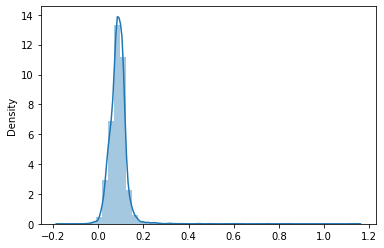

In [25]:
import seaborn as sns

sns.distplot(y_hat)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

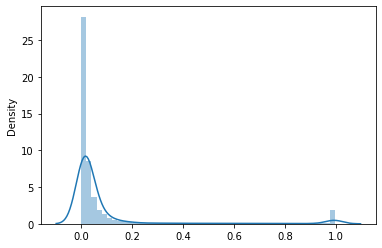

In [64]:
sns.distplot(y_reg)

In [65]:
submit = pd.read_csv("src/data/test.csv")
submit['Y_LABEL'] = y_reg
submit.head()

final_submit = pd.DataFrame()
final_submit['ID'] = submit['ID']
final_submit['Y_LABEL'] = y_reg

final_submit

,ID,Y_LABEL
0,TEST_0000,0.022910
1,TEST_0001,0.017946
2,TEST_0002,0.007738
3,TEST_0003,0.052838
4,TEST_0004,0.013332
...,...,...
6036,TEST_6036,0.015725
6037,TEST_6037,0.133542
6038,TEST_6038,0.009332
6039,TEST_6039,0.024032


In [66]:
def get_reg(v):
  if v >= 0.5:
    score = 1
  else:
    score = 0
  return score

final_submit['Y_LABEL'] = final_submit['Y_LABEL'].apply(lambda v: get_reg(v))
final_submit

final_submit.to_csv('src/data/submit3.csv', index=False)

In [67]:
final_submit.max()

ID         TEST_6040
Y_LABEL            1
dtype: object

In [68]:
df = final_submit
df[final_submit['Y_LABEL'] == 1]

,ID,Y_LABEL
6,TEST_0006,1
32,TEST_0032,1
35,TEST_0035,1
37,TEST_0037,1
41,TEST_0041,1
...,...,...
5908,TEST_5908,1
5941,TEST_5941,1
5948,TEST_5948,1
6015,TEST_6015,1
